# Data Analysis using Python - Rafa Abdelazim

## Assignment: Analysing and Identifying trends using NHS real world data

NHS needs a data-driven approach in order to understand if there has been adequate staffing and capacity in all it's networks and the actual utisation of resources in order to reduce or eliminate missed appointments. In this notebook we will utilise the data in order to perfrom exploratory analysis, create visualisations to identify trends and draw insights.

## 1.0 Preparing the environment

### 1.1 Github link and account

https://github.com/RafaSatti - Github link 

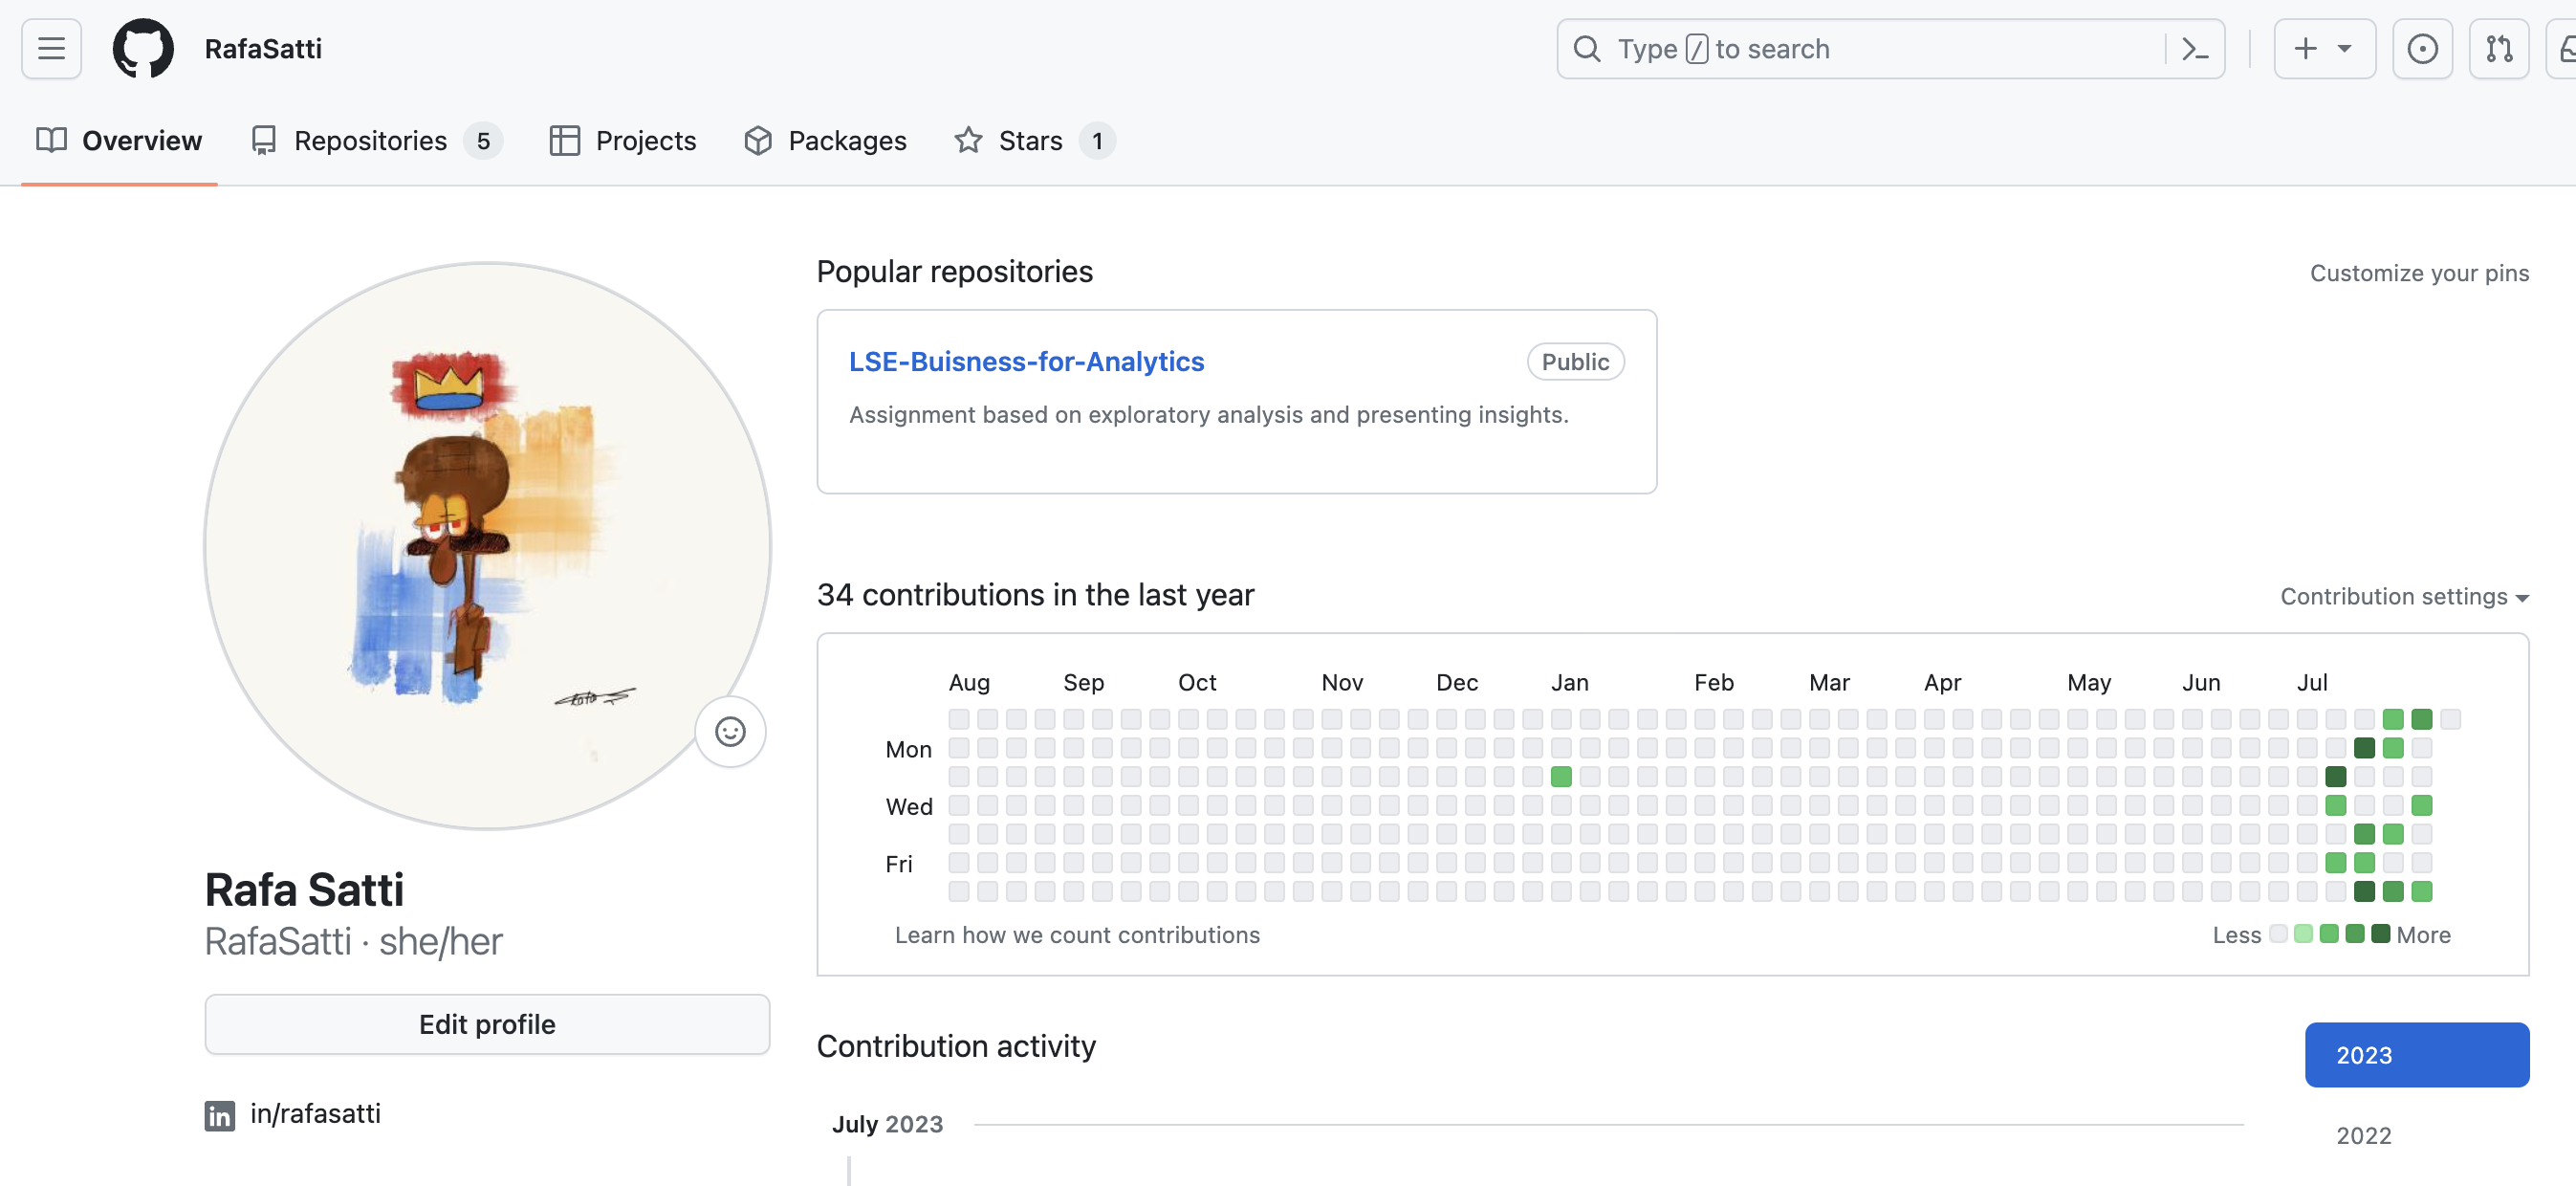

### 1.2 Import required libraries and datasets

In [406]:
# Import all needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Successfully imported!")

Successfully imported!


In [407]:
# Upload all datasets
ad = pd.read_csv('actual_duration.csv')
ar = pd.read_csv('appointments_regional.csv')
nc = pd.read_excel('national_categories.xlsx')

print("Successfully imported!")

Successfully imported!


### 1.3 Sense-checking data

**Report:** After loading the datasets, the first and last 5 rows were viewed in order to get a brief understanding of our data and to check if there is metadata stored as a footer. After viewing each dataset, we then sense-checked the data by retrieving the shape, datatype, description, metadata and lastly looked for any duplicates to avoid skewing our analysis later on. Luckily there were no duplicates except for the appointment regional dataset which returned 21,604 duplicates but issue was resolved by creating a new dataset "ar_clean" and dropped all duplicates in the original dataset. To check if the the results are accurate, we then double checked number of rows and columns in the new dataset.

**Actual duration dataset:**

In [408]:
# View first five rows of the dataframe
print("actual_duration first five rows:")
ad.head()

actual_duration first five rows:


,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,31-60 Minutes,364
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,21-30 Minutes,619
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,6-10 Minutes,1698
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,Unknown / Data Quality,1277
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,16-20 Minutes,730


In [409]:
# View last five rows of the dataframe to check no metadata is stored as a footer
ad.tail()

,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
137788,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,30-Jun-22,31-60 Minutes,430
137789,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,30-Jun-22,21-30 Minutes,751
137790,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,30-Jun-22,16-20 Minutes,921
137791,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,30-Jun-22,11-15 Minutes,1439
137792,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,30-Jun-22,1-5 Minutes,1739


In [410]:
# Determine the column names
print("Actual duration dataset column names:")
print(ad.columns)

# Determine number of rows and columns
print("Actual duration dataset number or rows and columns:")
print(ad.shape)

# Determine datatypes
print("Actual duration dataset datatype:")
print(ad.dtypes)

Actual duration dataset column names:
Index(['sub_icb_location_code', 'sub_icb_location_ons_code',
       'sub_icb_location_name', 'icb_ons_code', 'region_ons_code',
       'appointment_date', 'actual_duration', 'count_of_appointments'],
      dtype='object')
Actual duration dataset number or rows and columns:
(137793, 8)
Actual duration dataset datatype:
sub_icb_location_code        object
sub_icb_location_ons_code    object
sub_icb_location_name        object
icb_ons_code                 object
region_ons_code              object
appointment_date             object
actual_duration              object
count_of_appointments         int64
dtype: object


In [416]:
# Describe data for a summary statistics of dataframe
print("Summary statistics:")
ad.describe().round(2)

Summary statistics:


,count_of_appointments
count,137793.00
mean,1219.08
std,1546.90
min,1.00
25%,194.00
50%,696.00
75%,1621.00
max,15400.00


In [417]:
# actual_duration metadata:
print("Actual Duration metadata:")
ad.info()

Actual Duration metadata:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137793 entries, 0 to 137792
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   sub_icb_location_code      137793 non-null  object
 1   sub_icb_location_ons_code  137793 non-null  object
 2   sub_icb_location_name      137793 non-null  object
 3   icb_ons_code               137793 non-null  object
 4   region_ons_code            137793 non-null  object
 5   appointment_date           137793 non-null  object
 6   actual_duration            137793 non-null  object
 7   count_of_appointments      137793 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 8.4+ MB


In [418]:
# Check for duplicate values to avoid skewing analysis
print("Number of duplicate rows:", ad.duplicated().sum())

Number of duplicate rows: 0


**Regional Appointments:**

In [419]:
# View first five rows of the dataframe
print("appointments_regional first five rows:")
ar.head()

appointments_regional first five rows:


,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971


In [420]:
# View last five rows of the dataframe to check no metadata is stored as a footer
ar.tail()

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
596816,E54000050,2022-06,Unknown,Unknown,Unknown,2 to 7 Days,21
596817,E54000050,2022-06,Unknown,Unknown,Unknown,22 to 28 Days,8
596818,E54000050,2022-06,Unknown,Unknown,Unknown,8 to 14 Days,28
596819,E54000050,2022-06,Unknown,Unknown,Unknown,More than 28 Days,17
596820,E54000050,2022-06,Unknown,Unknown,Unknown,Same Day,10


In [421]:
# Determine the column names
print("appointments_regional dataset column names:")
print(ar.columns)

# Determine number of rows and columns
print("appointments_regional dataset number or rows and columns:")
print(ar.shape)

# Determine datatypes
print("appointments_regional dataset datatype:")
print(ar.dtypes)

appointments_regional dataset column names:
Index(['icb_ons_code', 'appointment_month', 'appointment_status', 'hcp_type',
       'appointment_mode', 'time_between_book_and_appointment',
       'count_of_appointments'],
      dtype='object')
appointments_regional dataset number or rows and columns:
(596821, 7)
appointments_regional dataset datatype:
icb_ons_code                         object
appointment_month                    object
appointment_status                   object
hcp_type                             object
appointment_mode                     object
time_between_book_and_appointment    object
count_of_appointments                 int64
dtype: object


In [422]:
# Describe data for a summary statistics of dataframe
print("Summary statistics:")
ar.describe().round(2)

Summary statistics:


,count_of_appointments
count,596821.00
mean,1244.60
std,5856.89
min,1.00
25%,7.00
50%,47.00
75%,308.00
max,211265.00


In [20]:
# appointments_regional metadata:
print("appointments_regional metadata:")
ad.info()

appointments_regional metadata:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137793 entries, 0 to 137792
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   sub_icb_location_code      137793 non-null  object
 1   sub_icb_location_ons_code  137793 non-null  object
 2   sub_icb_location_name      137793 non-null  object
 3   icb_ons_code               137793 non-null  object
 4   region_ons_code            137793 non-null  object
 5   appointment_date           137793 non-null  object
 6   actual_duration            137793 non-null  object
 7   count_of_appointments      137793 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 8.4+ MB


In [21]:
# Check for duplicate values to avoid skewing analysis
print("Number of duplicate rows:", ar.duplicated().sum())

Number of duplicate rows: 21604


In [24]:
# Drop duplicate values in appointment_region dataframe
ar_clean = ar.drop_duplicates()
print("Number of duplicate values in cleaned dataframe:", ar_clean.duplicated().sum())

Number of duplicate values in cleaned dataframe: 0


In [25]:
# View number of rows and columns in ar and ar_clean
print("Number of rows and columns in ar:", ar.shape)
print("Number of rows and columns in ar_clean:", ar_clean.shape)

Number of rows and columns in ar: (596821, 7)
Number of rows and columns in ar_clean: (575217, 7)


**National categories:**

In [22]:
# View first five row of dataframe
print("National Categories:")
nc.head()

National Categories:


,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08


In [23]:
# View last five rows of the dataframe to check no metadata is stored as a footer
nc.tail()

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
817389,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Unplanned Clinical Activity,12,2022-06
817390,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Planned Clinics,4,2022-06
817391,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Planned Clinical Procedure,92,2022-06
817392,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,General Consultation Routine,4,2022-06
817393,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,General Consultation Acute,19,2022-06


In [26]:
# Determine the column names
print("national_categories dataset column names:")
print(ad.columns)

# Determine number of rows and columns
print("national_categories dataset number or rows and columns:")
print(ad.shape)

# Determine datatypes
print("national_categories dataset datatype:")
print(ad.dtypes)

national_categories dataset column names:
Index(['sub_icb_location_code', 'sub_icb_location_ons_code',
       'sub_icb_location_name', 'icb_ons_code', 'region_ons_code',
       'appointment_date', 'actual_duration', 'count_of_appointments'],
      dtype='object')
national_categories dataset number or rows and columns:
(137793, 8)
national_categories dataset datatype:
sub_icb_location_code        object
sub_icb_location_ons_code    object
sub_icb_location_name        object
icb_ons_code                 object
region_ons_code              object
appointment_date             object
actual_duration              object
count_of_appointments         int64
dtype: object


In [27]:
# Describe data for a summary statistics of dataframe
print("Summary statistics:")
nc.describe().round(2)

Summary statistics:


,count_of_appointments
count,817394.00
mean,362.18
std,1084.58
min,1.00
25%,7.00
50%,25.00
75%,128.00
max,16590.00


In [28]:
# national_categories metadata:
print("national_categories metadata:")
nc.info()

national_categories metadata:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817394 entries, 0 to 817393
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   appointment_date       817394 non-null  datetime64[ns]
 1   icb_ons_code           817394 non-null  object        
 2   sub_icb_location_name  817394 non-null  object        
 3   service_setting        817394 non-null  object        
 4   context_type           817394 non-null  object        
 5   national_category      817394 non-null  object        
 6   count_of_appointments  817394 non-null  int64         
 7   appointment_month      817394 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 49.9+ MB


In [29]:
# Check for duplicate values to avoid skewing analysis
print("Number of duplicate rows:", nc.duplicated().sum())

Number of duplicate rows: 0


### 1.4 Checking for missing data
**Report:** No missing values in all datasets.

In [30]:
# View count of missing values in Actual duration
ad.isnull().sum()

sub_icb_location_code        0
sub_icb_location_ons_code    0
sub_icb_location_name        0
icb_ons_code                 0
region_ons_code              0
appointment_date             0
actual_duration              0
count_of_appointments        0
dtype: int64

In [31]:
# View count of missing values in regional appointments
ar_clean.isnull().sum()

icb_ons_code                         0
appointment_month                    0
appointment_status                   0
hcp_type                             0
appointment_mode                     0
time_between_book_and_appointment    0
count_of_appointments                0
dtype: int64

In [32]:
# View count of missing values in national categories
nc.isnull().sum()

appointment_date         0
icb_ons_code             0
sub_icb_location_name    0
service_setting          0
context_type             0
national_category        0
count_of_appointments    0
appointment_month        0
dtype: int64

## 2.0 Exploratory Data Analysis

**Report:** This report presents key insights and trends gathered during an exploratory data analysis of the NHS dataset in order to answer the following questions:
1. How many locations are in the dataset?
2. What are the five locations with the highest number of records?
3. How many service settings, context types, national categories, and appointment statuses are there?

**Insights:**
Using the value_count() and nunique() function I've managed to retrieve the count of unique values in each specified column to answer given questions. I've also defined a series for unique locations in order to calculate the 5 locations with the highest number of records using the nlargest() function, which shows records ranging from approximately 7,000,000 and 12,000,000 appointments between North West London, Kent and Medway, Devon, Hampshire and Isle of Wight and North East London. I've also created a piechart for each question to show the different count of appointments in relation to the various categories. 
We can also notice a lack of good data collection as number of 'Unknown' appointment status are quite high.

**Trends:**

Popular categories:
- From our analysis we gathered that GPs are the most used service setting making up more than 90% of appointments in all service setting.
- Care related encounters being the highest lead of context type making up 86.7%.
- Inconsistent mapping and general consultations (acute and routine) making up the highest subdivision, followed by planned clinics and clinical triage.
- 91.3% of appointment Statuses have been attended.

**Question 1:** How many locations are there in the data set?

In [33]:
# Locations are grouped by region, ICB and sub-ICB codes 
# Calculate the number of unique values in each of the columns
print("Number of regions:",ad['region_ons_code'].nunique())
print("Number of ICB locations:",ad['icb_ons_code'].nunique())
print("Number of sub-ICB locations:",ad['sub_icb_location_ons_code'].nunique())

Number of regions: 7
Number of ICB locations: 42
Number of sub-ICB locations: 106


In [239]:
# Retrive all region codes with count
ad['region_ons_code'].value_counts()

E40000010    33112
E40000012    29063
E40000011    25015
E40000007    18888
E40000005    15130
E40000006     9465
E40000003     7120
Name: region_ons_code, dtype: int64

In [290]:
# Define a name for each region code 
def get_name_based_on_code(value):
    if value == 'E40000010':
        return "Midlands"
    elif value == 'E40000012':
        return "North East England and Yorkshire"
    elif value == 'E40000011':
        return "North West England"
    elif value == 'E40000007':
        return "East of England"
    elif value == 'E40000006':
        return "South West England"
    elif value == 'E40000005':
        return "South East England"
    elif value == 'E40000003':
        return "London"
    else:
        return "Unknown"

# Create a column with Region name according to it's code
ad = ad.assign(region_name=ad['region_ons_code'].apply(get_name_based_on_code))

# View Dataframe to view changes
ad.head(2)

,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments,region_name
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,31-60 Minutes,364,North East England and Yorkshire
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,21-30 Minutes,619,North East England and Yorkshire


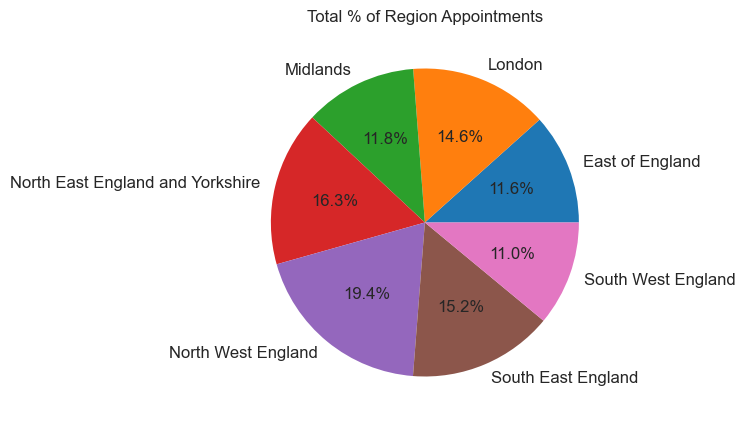

In [288]:
# Calculate the total number of appointments in ad dataframe
total_reg = ad['count_of_appointments'].sum()

# Create dataframe by grouping region name and count of appointments
region = ad.groupby('region_name')[['count_of_appointments']]\
.sum()\
.reset_index()

# Create a column to calaculate percentage of each region from total
region['Total%'] = region['count_of_appointments'] / total_reg * 100

# Create a pie chart show region name percentages
plt.figure(figsize=(7,5))
plt.pie(region['Total%'],
        labels = region['region_name'],
        autopct='%1.1f%%', 
        textprops={'fontsize': 12})
# Place a title
plt.title("Total % of Region Appointments")

# Save plot
plt.savefig('region_appt.png')

In [289]:
# View dataframe to view count_of_appointments of each region
region

,region_name,count_of_appointments,Total%
0,East of England,19546694,11.636274
1,London,24488519,14.578175
2,Midlands,19880924,11.835244
3,North East England and Yorkshire,27425610,16.326644
4,North West England,32574555,19.391845
5,South East England,25577953,15.226722
6,South West England,18486437,11.005096


**Question 2:** What are the five locations with the highest number of records?

In [34]:
# Create a dataframe grouped by sub-ICB-location and total number of appointments 
locations = nc.groupby('sub_icb_location_name')[['count_of_appointments']]\
.sum()\
.sort_values('count_of_appointments', ascending = False)\
.reset_index()

# Create a dataframe to show five locations with highest number of appointments
top5 = locations.nlargest(5,'count_of_appointments').iloc[:, :2]

# Use appropriate docstrings and view dataframe
print("Five locations with the highest number of appointments:")
top5

Five locations with the highest number of appointments:


,sub_icb_location_name,count_of_appointments
0,NHS North West London ICB - W2U3Z,12142390
1,NHS North East London ICB - A3A8R,9588891
2,NHS Kent and Medway ICB - 91Q,9286167
3,NHS Hampshire and Isle Of Wight ICB - D9Y0V,8288102
4,NHS South East London ICB - 72Q,7850170


**Question 3.1:** How many service settings are there?

In [36]:
# Sum of total number of appointments to calculate percentages from total
total_appts = nc['count_of_appointments'].sum()

# Use appropriate docstrings
print("Total number of appointments:", total_appts)

Total number of appointments: 296046770


In [37]:
# Show number of service settings
print("Number of service settings:", nc['service_setting'].nunique())

# Create dataframe to show all service settings with percentages
service_setting = nc.groupby('service_setting')[['count_of_appointments']]\
.sum()\
.sort_values('count_of_appointments', ascending = False)\
.reset_index()

# Calculate percentage of appointments in each service setting
service_setting['Total perc'] = service_setting['count_of_appointments']/total_appts * 100

# View dataframe
service_setting.round(2)

Number of service settings: 5


,service_setting,count_of_appointments,Total perc
0,General Practice,270811691,91.48
1,Unmapped,11080810,3.74
2,Primary Care Network,6557386,2.21
3,Other,5420076,1.83
4,Extended Access Provision,2176807,0.74


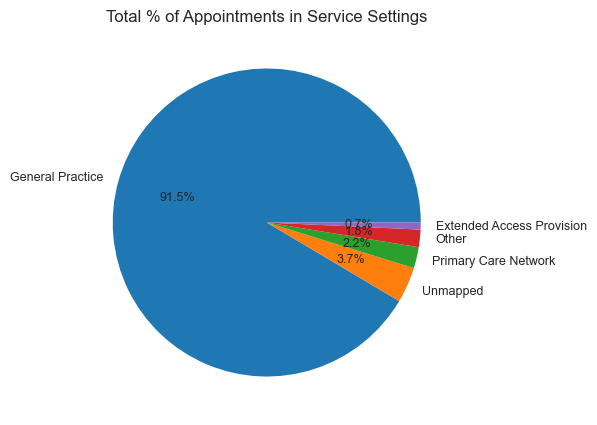

In [425]:
# Create a pie chart to illustrate service_settings total appointments (%)
plt.figure(figsize=(7,5))
plt.pie(service_setting['Total perc'], 
        labels = service_setting['service_setting'],
        autopct='%1.1f%%', 
        textprops={'fontsize': 9})

# Add title name
plt.title("Total % of Appointments in Service Settings")

# Save plot
plt.savefig('piechart_ss.png')

**Question 3.2:** How many context types are there?

In [192]:
# Show number of context types
print("Number of context types:", nc['context_type'].nunique())

# Sum of all appointments to calculate percentage from total
total_appt = nc['count_of_appointments'].sum()

# Create dataframe to show all service settings with percentages
context_type = nc.groupby('context_type')[['count_of_appointments']]\
.sum()\
.reset_index()

# # Calculate percentage of appointments in each service setting
context_type['Total perc(%)'] = context_type['count_of_appointments']/total_appt * 100

# View dataframe
context_type.round(2)

Number of context types: 3


,context_type,count_of_appointments,Total perc(%)
0,Care Related Encounter,257075158,86.84
1,Inconsistent Mapping,27890802,9.42
2,Unmapped,11080810,3.74


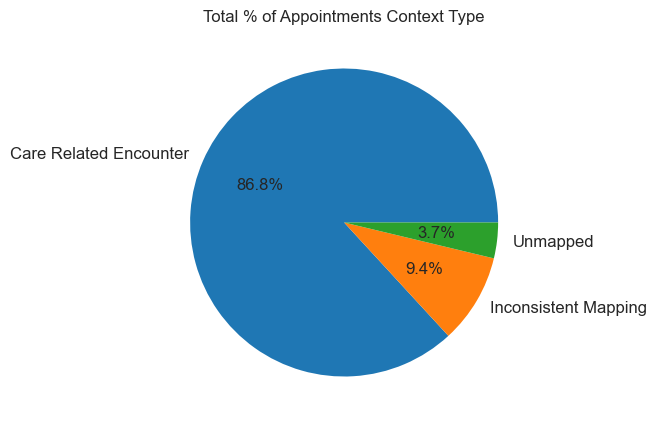

In [296]:
# Create a pie chart to illustrate percentage of total appointment's context type
plt.figure(figsize=(7,5))
plt.pie(context_type['Total perc(%)'], 
        labels = context_type['context_type'],
        autopct='%1.1f%%', 
        textprops={'fontsize': 12})

# Add title
plt.title("Total % of Appointments Context Type")

# Save plot
plt.savefig('piechart_ct.png')

**Question 3.3:** How many national categories are there?

In [405]:
# Determine the number of national categories.
print("Number of national categories:",nc['national_category'].nunique())

# Create dataframe to show all service settings with percentages
national_categories = nc.groupby('national_category')[['count_of_appointments']]\
.sum()\
.sort_values('count_of_appointments', ascending = False)\
.reset_index()

# Calculate percentage of appointments in each national category
national_categories['Total perc (%)'] = national_categories['count_of_appointments']/total_appt * 100

# Create dataframe to exclue null values (any national categories less than 3%)
nc_nc = national_categories[national_categories['Total perc (%)'] >= 3]
nc_nc

Number of national categories: 18


,national_category,count_of_appointments,Total perc (%)
0,General Consultation Routine,97271522,32.856809
1,General Consultation Acute,53691150,18.136036
2,Clinical Triage,41546964,14.033919
3,Planned Clinics,28019748,9.464636
4,Inconsistent Mapping,27890802,9.421080
5,Planned Clinical Procedure,25702694,8.681971
6,Unmapped,11080810,3.742925


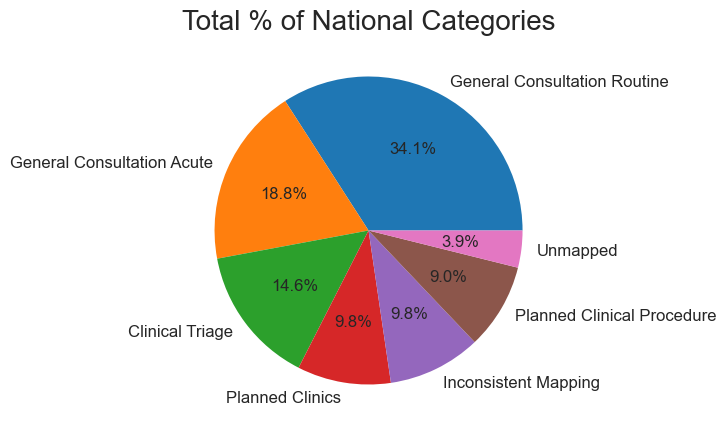

In [424]:
# Create a pie chart to illustrate percentage of national categories
plt.figure(figsize=(7,5))
plt.pie(nc_nc['Total perc (%)'],
        labels = nc_nc['national_category'],
        autopct='%1.1f%%', 
        textprops={'fontsize': 12})

# Add title
plt.title("Total % of National Categories", fontsize = 20)

# Save plot
plt.savefig('piechart_nc.png')

**Question 3.4:** How many appointment statuses are there?

In [188]:
# Determine the number of appointment status.
print("Number of appointment_status:",ar_clean['appointment_status'].nunique())

# Calculate total number of appointments in ar dataframe
ar_appt = ar_clean['count_of_appointments'].sum()

# Group by appointment status and add appointments 
appointment_status = ar_clean.groupby('appointment_status')[['count_of_appointments']]\
.sum()\
.sort_values('count_of_appointments', ascending = False)\
.reset_index()

# Calculate percentage of each appointment status from total 
appointment_status['Total perc (%)'] = appointment_status['count_of_appointments']/ar_appt * 100

# View dataframe
appointment_status.round(2)

Number of appointment_status: 3


,appointment_status,count_of_appointments,Total perc (%)
0,Attended,677646088,91.26
1,Unknown,34050656,4.59
2,DNA,30833015,4.15


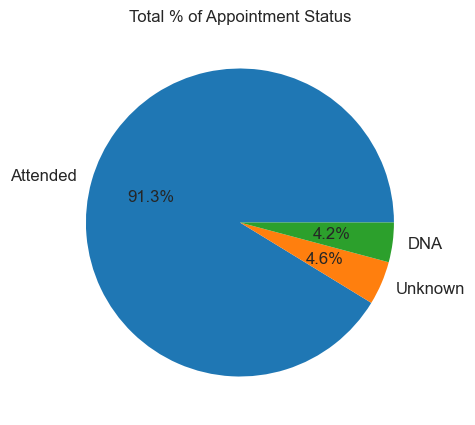

In [297]:
# Create a pie chart to illustrate the different appointment statuses
plt.figure(figsize=(7,5))
plt.pie(appointment_status['Total perc (%)'], 
        labels = appointment_status['appointment_status'],
        autopct='%1.1f%%', 
        textprops={'fontsize': 12})

# Add title
plt.title("Total % of Appointment Status")

# Save plot
plt.savefig('piechart_as.png')

## 3.0 Analyzing the data

**Report:** This report demonstrates further insights from our data to answer more specific questions posed by the NHS. The questions we want to answer are: 
1. Between what dates were appointments scheduled? 
2. Which service setting reported the most appointments in North West London from 1 January to 1 June 2022?
3. Which month had the highest number of appointments?
4. What was the total number of records per month?

**Key Insights:**

- From our data analysis we can determine that :
  - the "actual_duration" dataset's appointments have been scheduled from 01/12/2021 and 30/06/2022 (7 months)
  - the "national_categories" dataset's appointments have been scheduled from 01/08/2021 and 30/06/2022 (11 months)     - the "appointments_region" dataset where appointments have been scheduled from 01/01/2020 and 30/06/2022 (2 years 5 months).
  
- We've also discovered the service setting that was most popular for NHS North West London from 1 January to 1 June 2022 was GPs making up 2087 out of 5889 (35%) service settings.

- Months with the highest number of records was 10/2021, 11/2021 and 03/2022 with all making up a total of around 4% of total number of appointments.

**Question 1:** Between what dates were appointments scheduled?

**Actual duration dataset:**

In [56]:
# Change the date format of ad['appointment_date'].
ad['appointment_date'] = pd.to_datetime(ad['appointment_date'])
ad.dtypes

sub_icb_location_code                object
sub_icb_location_ons_code            object
sub_icb_location_name                object
icb_ons_code                         object
region_ons_code                      object
appointment_date             datetime64[ns]
actual_duration                      object
count_of_appointments                 int64
dtype: object

In [223]:
# Determine the minimum and maximum dates in the ad DataFrame.
ad_min_date = ad['appointment_date'].min()
ad_max_date = ad['appointment_date'].max()

# Use appropriate docstrings.
print("Min date:", ad_min_date)
print("Max date:", ad_max_date)

Min date: 2021-12-01 00:00:00
Max date: 2022-06-30 00:00:00


In [232]:
# Total number of appointments in actual duration dataset 
ad_total = ad['count_of_appointments'].sum() 
print("Total number of appointments:",ad_total)

Total number of appointments: 167980692


**Regional Appointments:**

In [302]:
# Change the date format of ar_clean['appointment_month'].
ar_clean['appointment_month'] = pd.to_datetime(ar_clean['appointment_month'])
ar_clean.dtypes

icb_ons_code                                 object
appointment_month                    datetime64[ns]
appointment_status                           object
hcp_type                                     object
appointment_mode                             object
time_between_book_and_appointment            object
count_of_appointments                         int64
dtype: object

In [61]:
# Determine the minimum and maximum dates in the ar_clean DataFrame.
ar_min_date = ar_clean['appointment_month'].min()
ar_max_date = ar_clean['appointment_month'].max()

# Use appropriate docstrings.
print("Min date:", ar_min_date)
print("Max date:", ar_max_date) 

Min date: 2020-01-01 00:00:00
Max date: 2022-06-01 00:00:00


In [230]:
# Calculate total number of appointments in actual duration dataset
ar_total = ar_clean['count_of_appointments'].sum() 
print("Total number of appointments:", ar_total)

Total number of appointments: 742529759


**National Categories:**

In [58]:
# Change the data format of nc['appointment_date'].
nc['appointment_date'] = pd.to_datetime(nc['appointment_date'])
nc.dtypes

appointment_date         datetime64[ns]
icb_ons_code                     object
sub_icb_location_name            object
service_setting                  object
context_type                     object
national_category                object
count_of_appointments             int64
appointment_month                object
dtype: object

In [59]:
# Determine the minimum and maximum dates in the nc DataFrame.
nc_min_date = nc['appointment_date'].min()
nc_max_date = nc['appointment_date'].max()

# Use appropriate docstrings.
print("Min date:", nc_min_date)
print("Max date:", nc_max_date)

Min date: 2021-08-01 00:00:00
Max date: 2022-06-30 00:00:00


In [231]:
# Total number of appointments in national categories dataset 
nc_total = nc['count_of_appointments'].sum() 
print("Total number of appointments:",nc_total)

Total number of appointments: 296046770


**Question 2:** Which service setting was the most popular for NHS North West London from 1 January to 1 June 2022?

In [62]:
# For each of these service settings, determine the number of records available for the period and the location. 

# Create dataframe for NW london location between 01/01/2022 and 01/06/2022
start_date = pd.to_datetime('2022-01-01')
end_date = pd.to_datetime('2022-06-01')
nw_ldn = nc[(nc['appointment_date'] >= start_date)\
            & (nc['appointment_date'] < end_date)\
            & (nc['sub_icb_location_name'] == 'NHS North West London ICB - W2U3Z')]

# Create dataframe to show service_settings in descending order
ser_count = nw_ldn['service_setting'].value_counts(ascending=False)
print("Most popular service setting in the NHS North West London from 1 January to 1 June 2022:")
ser_count

Most popular service setting in the NHS North West London from 1 January to 1 June 2022:


General Practice             2087
Other                        1308
Primary Care Network         1263
Extended Access Provision    1080
Unmapped                      151
Name: service_setting, dtype: int64

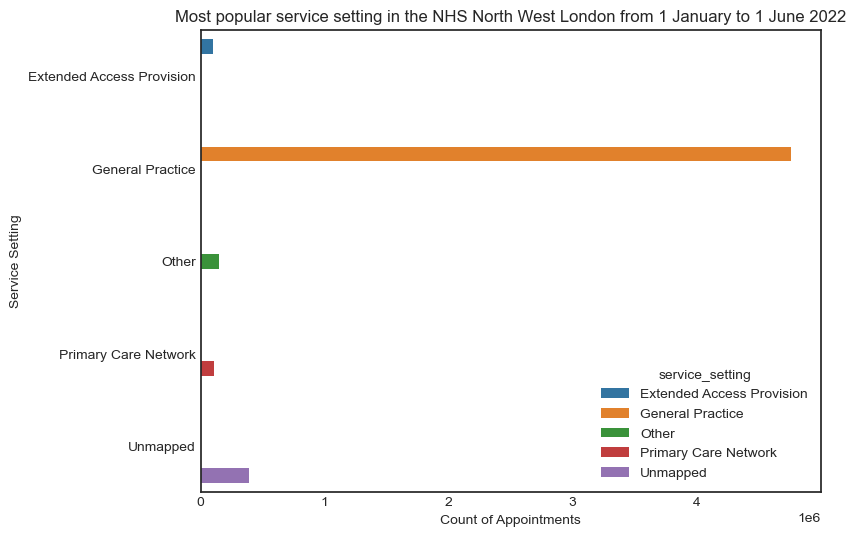

In [63]:
# Create bar chart to show most popular service setting in NW London
# Group data to create visualisation
nw_ss = nw_ldn.groupby('service_setting')[['count_of_appointments']].sum().reset_index()

# Plot bar graph
plt.figure(figsize=(8,6))
sns.barplot(x='count_of_appointments',
            y='service_setting',
            data=nw_ss,
            hue='service_setting')

# Edit plot 
plt.xlabel('Count of Appointments')
plt.ylabel('Service Setting')
plt.title('Most popular service setting in the NHS North West London from 1 January to 1 June 2022')

# Save plot
plt.savefig('NWldn.png')

In [402]:
# Total number of service settings in the NHS North West London from 1 January to 1 June 2022
ss_sum = nw_ldn['service_setting'].count()

# Use appropriate docstrings
print("Total number service settings in NW London from Jan to June 2022:", ss_sum)

# Calculate % of GP appointments in NW London from Jan to June 2022:
gp_nwl = 2087 / ss_sum * 100

# Use appropriate docstrings
print("Percentage of GP appointments in NW London from Jan to June 2022 (%):", gp_nwl.round(0))

Total number service settings in NW London from Jan to June 2022: 5889
Percentage of GP appointments in NW London from Jan to June 2022 (%): 35.0


**Question 3**: What was the total number of records per month

In [185]:
# Calculate total number of appointments to calculate percentage
total_appt = ar_clean['count_of_appointments'].sum()

In [186]:
# Create dataframe to determine all months with number of appointments in descending order
appt_month = ar_clean.groupby('appointment_month')[['count_of_appointments']]\
   .sum().sort_values('count_of_appointments', ascending = False)\
   .reset_index()

# Calculate percentage from total number of appointments
appt_month['total perc'] = appt_month['count_of_appointments']/total_appt * 100

# Use appropriate docstrings
print("total number of appointments:", total_appt)
appt_month.round(2)

total number of appointments: 742529759


,appointment_month,count_of_appointments,total perc
0,2021-11-01,30395923,4.09
1,2021-10-01,30296850,4.08
2,2022-03-01,29586020,3.98
3,2021-09-01,28514685,3.84
4,2020-10-01,28296051,3.81
5,2022-05-01,27478652,3.70
6,2021-03-01,27216974,3.67
7,2020-01-01,27191758,3.66
8,2021-06-01,26775653,3.61
9,2020-09-01,26706462,3.60


**Question 4:** Which month had the highest number of appointments?

In [68]:
# Create dataframe to determine highest number of appointments using appt_month df from question 4
highest_month = appt_month.nlargest(3, 'count_of_appointments').iloc[:,:2]

# Use appropriate doctstrings
print("Month with the highest number of appointments:")
highest_month

Month with the highest number of appointments:


,appointment_month,count_of_appointments
0,2021-11-01,30395923
1,2021-10-01,30296850
2,2022-03-01,29586020


## 4.0 Visualising and Identifying Trends

**Objective 1:** Visualisations indicating the number of appointments per month for service settings, context types, and national categories.

**Insights and trends:**
- All graphs show a sudden drop in number of appointments on November 2021, increasing again in Feburary 2022 then fluctating each month up until June 2022.
- For service settings we can see that general practices are drastically more popular than other services and a drop in 'unmapped' services from December 2021 indicating an improvement in data recording.
- For context types it's evident that care related encouters are most popular.
- For national categories, visualisation shows that routine general consultation are most popular (ranging from around 790,000 and 1 million appointments) followed by acute general consultations (ranging from around 410-590 thousand appointments) and clinical triage (ranging from around (370-400 thousand appointments).
- A gradual increase in number of planned clinical procedure visits from August 2021 peaking at October 2021 and gradually decreasing again.

**Number of appointments per months for service settings**

/var/folders/1t/87673c8s7d907kqz2mmpmfr80000gn/T/ipykernel_75418/1879813919.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Appointment month',


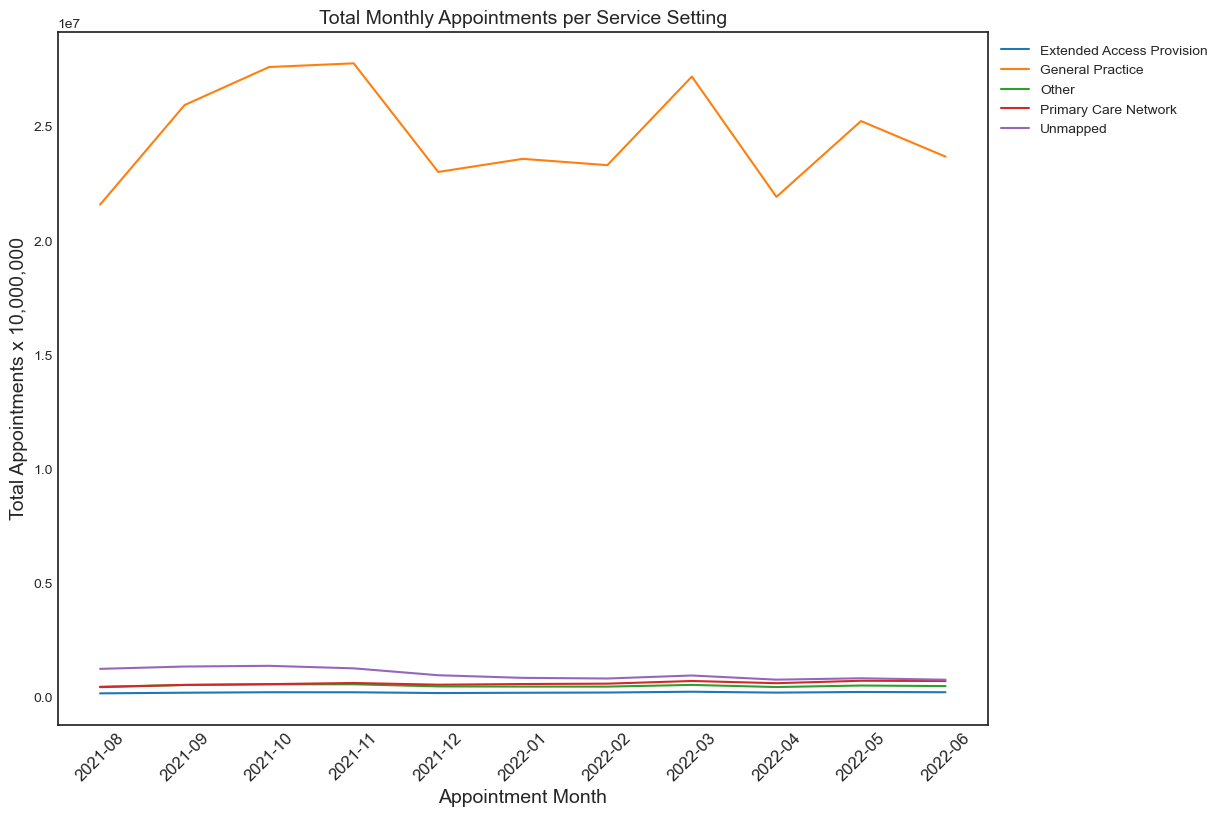

In [69]:
# Aggregate the appointments per month and determine the sum of the appointments per month
nc_ss = nc.groupby(['service_setting','appointment_month'])['count_of_appointments']\
.sum()\
.reset_index()\
.rename(columns={'service_setting':'Service Setting',
                'appointment_month': 'Appointment month',
                'count_of_appointments': 'Total number of appointments'})

# Create lineplot to show insights
plt.figure(figsize=(12,9))
sns.lineplot(x='Appointment month',
             y= 'Total number of appointments',
             data=nc_ss,
             hue='Service Setting',
             ci=None)

# Add labels and edit fonts and legends
plt.title('Total Monthly Appointments per Service Setting', fontsize=14)
plt.xlabel('Appointment Month', fontsize=14)
plt.xticks(fontsize=12, rotation=45)
plt.ylabel('Total Appointments x 10,000,000', fontsize=14)
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1));

# Save plot
plt.savefig('ss_appt.png')

**Number of appointments per month for context types**

/var/folders/1t/87673c8s7d907kqz2mmpmfr80000gn/T/ipykernel_75418/3328978905.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Appointment month',


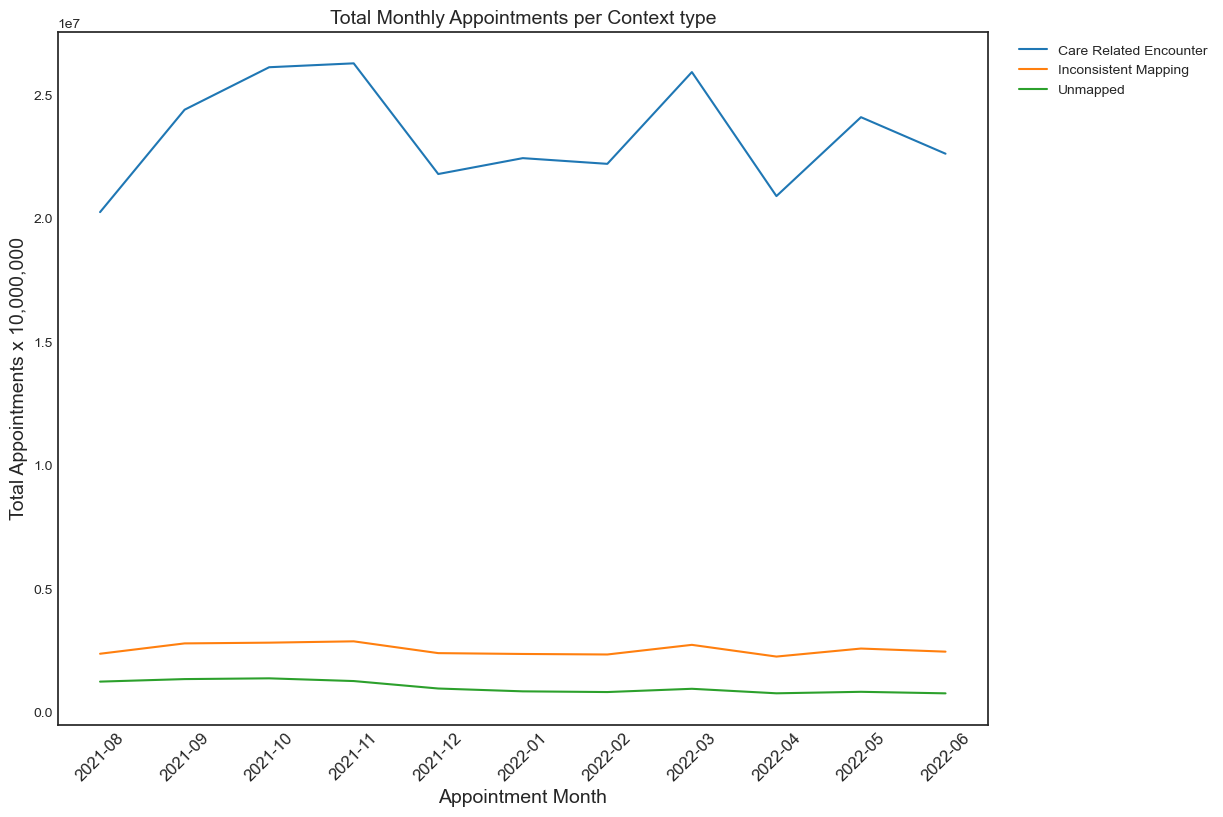

In [70]:
# Aggregate the appointments per month and determine the sum of the appointments per month
nc_ct = nc.groupby(['context_type','appointment_month'])['count_of_appointments']\
.sum()\
.reset_index()\
.rename(columns={'context_type':'Context type',
                'appointment_month': 'Appointment month',
                'count_of_appointments': 'Total number of appointments'})

# Create lineplot to show insights
plt.figure(figsize=(12,9))
sns.lineplot(x='Appointment month',
             y='Total number of appointments',
             data=nc_ct,
             hue='Context type',
             ci = None)

# Add labels and edit fonts and legends
plt.title('Total Monthly Appointments per Context type', fontsize=14)
plt.xlabel('Appointment Month', fontsize=14)
plt.xticks(fontsize=12, rotation=45)
plt.ylabel('Total Appointments x 10,000,000', fontsize=14)
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1));

# Save plot
plt.savefig('nc_ct.png')

**Number of appointments per month for national categories**

/var/folders/1t/87673c8s7d907kqz2mmpmfr80000gn/T/ipykernel_75418/628489691.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Appointment month',


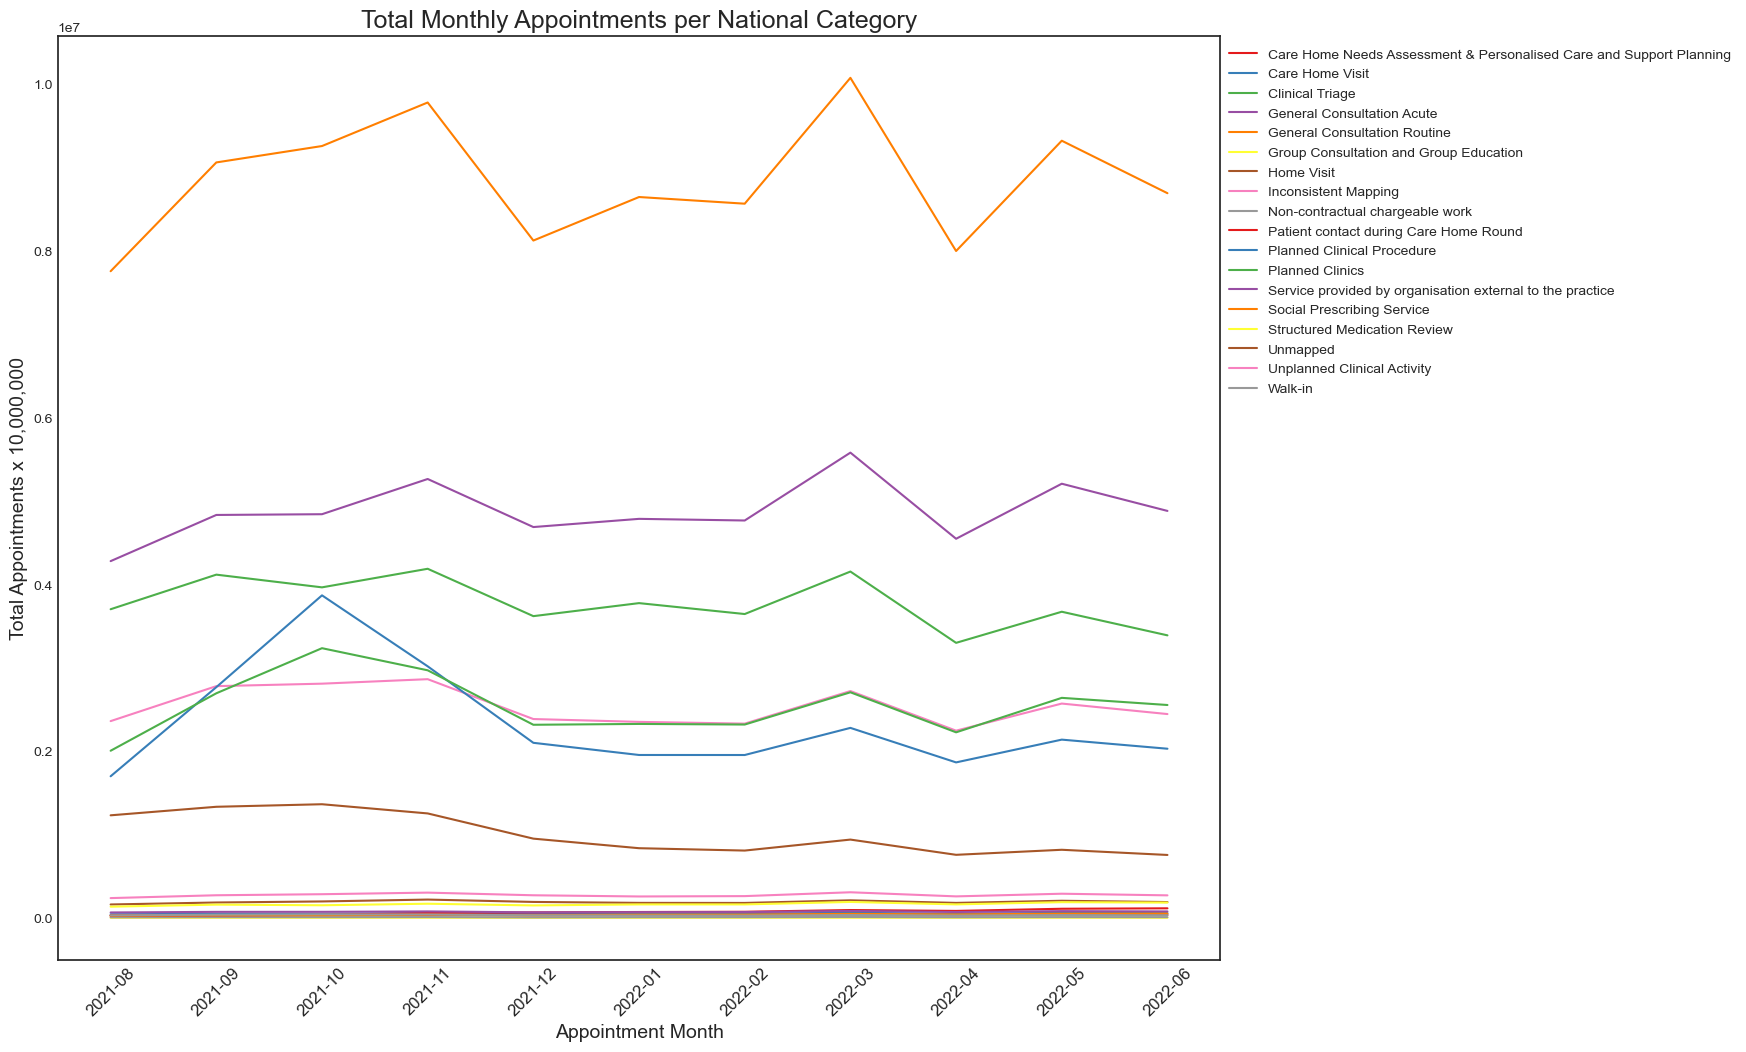

In [301]:
# Aggregate the appointments per month and determine the sum of the appointments per month
nc_nc = nc.groupby(['national_category','appointment_month'])['count_of_appointments']\
.sum()\
.reset_index()\
.rename(columns={'national_category':'National category',
                'appointment_month': 'Appointment month',
                'count_of_appointments': 'Total number of appointments'})

# Create lineplot to show insights
plt.figure(figsize=(15,12))
sns.lineplot(x='Appointment month',
             y='Total number of appointments',
             data=nc_nc,
             hue='National category',
             ci = None,
             palette='Set1')

# Add labels and edit fonts and legends
plt.title('Total Monthly Appointments per National Category', fontsize=18)
plt.xlabel('Appointment Month', fontsize=14)
plt.xticks(fontsize=12, rotation=45)
plt.ylabel('Total Appointments x 10,000,000', fontsize=14)
plt.legend(loc='upper right', bbox_to_anchor=(1.45, 1));

# Save plot
plt.savefig('national_cat.png')

**Objective 2:** Visualisations indicating the number of appointments for service setting per season.

**Insights and trends:**
- Throughout all seasons we can see there has been no appointments over the weekend.
- Appointment numbers peak on Mondays and gradually decrease over the week.
- Over spring we can see there has been no appointments between the 15th and 18th of April, probably due to Easter break.
- Appointment numbers are relatively low in Summer in comparison to other seasons, as they all peak at more than 1.2 million which show's lack of staffing capacity due to the NHS only being able to accomodate 1.2 million a day

In [72]:
# Create dataframe to group data by service setting and appointment month
nc_ss_day = nc.groupby(['appointment_date','appointment_month','service_setting'])['count_of_appointments']\
.sum()\
.reset_index()

#View dataframe 
nc_ss_day

,appointment_date,appointment_month,service_setting,count_of_appointments
0,2021-08-01,2021-08,Extended Access Provision,438
1,2021-08-01,2021-08,General Practice,3411
2,2021-08-01,2021-08,Other,401
3,2021-08-01,2021-08,Primary Care Network,323
4,2021-08-01,2021-08,Unmapped,1054
...,...,...,...,...
1665,2022-06-30,2022-06,Extended Access Provision,9163
1666,2022-06-30,2022-06,General Practice,1124374
1667,2022-06-30,2022-06,Other,23115
1668,2022-06-30,2022-06,Primary Care Network,34774


In [77]:
# View datatypes to make changes if needed
nc_ss_day.dtypes

appointment_date         datetime64[ns]
appointment_month                object
service_setting                  object
count_of_appointments             int64
dtype: object

**Summer:**

/var/folders/1t/87673c8s7d907kqz2mmpmfr80000gn/T/ipykernel_75418/4184777209.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(y='count_of_appointments',


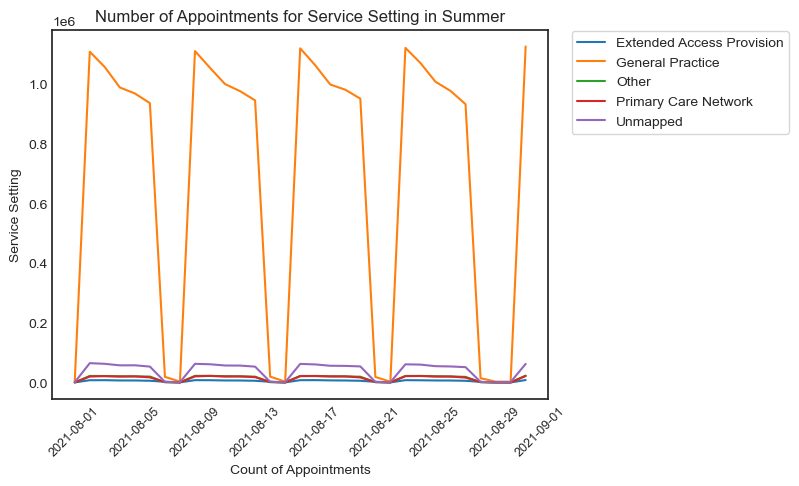

In [237]:
# Filter data (Summer)
Summer = nc_ss_day[nc_ss_day['appointment_month'] == '2021-08']

# Create lineplot for number of appointments in each service setting during Summer
sns.lineplot(y='count_of_appointments',
             x='appointment_date',
             hue='service_setting',
             data= Summer,
             ci = None) 

# Format plot and rename axis
plt.title('Number of Appointments for Service Setting in Summer')
plt.xlabel('Count of Appointments', fontsize=10)
plt.xticks(fontsize=9, rotation=45)
plt.ylabel('Service Setting')
plt.legend(loc='lower right', bbox_to_anchor=(1.5,0.7), frameon=True)

# Save plot
plt.savefig('summer_ss.png')

**Autumn:**

/var/folders/1t/87673c8s7d907kqz2mmpmfr80000gn/T/ipykernel_75418/2860213955.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='appointment_date',


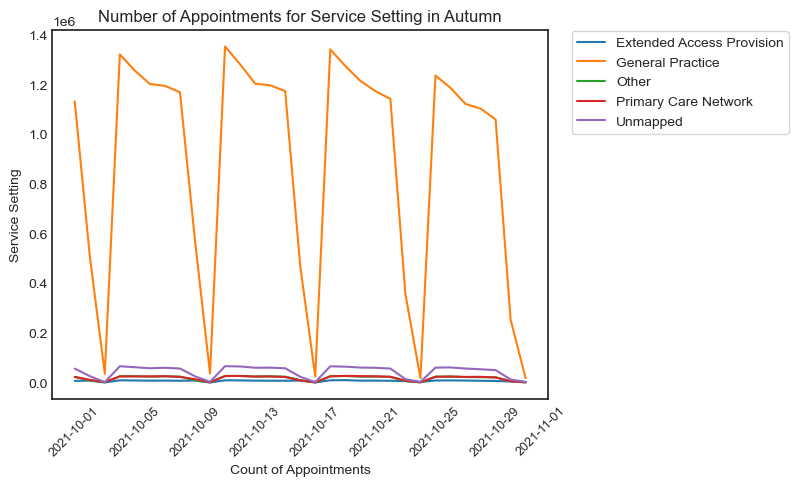

In [236]:
# Filter data (Autumn)
Autumn = nc_ss_day[nc_ss_day['appointment_month'] == '2021-10']

# Create lineplot for number of appointments in each service setting during Autumn
sns.lineplot(x='appointment_date',
             y='count_of_appointments',
             data= Autumn,
             hue = 'service_setting',
             ci = None) 

plt.title('Number of Appointments for Service Setting in Autumn')
plt.xlabel('Count of Appointments', fontsize=10)
plt.xticks(fontsize=9, rotation=45)
plt.ylabel('Service Setting')
plt.legend(loc='lower right', frameon=True, bbox_to_anchor=(1.5,0.7))

plt.savefig('autumn_ss.png')

**Winter:**

/var/folders/1t/87673c8s7d907kqz2mmpmfr80000gn/T/ipykernel_75418/3457351546.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='appointment_date',


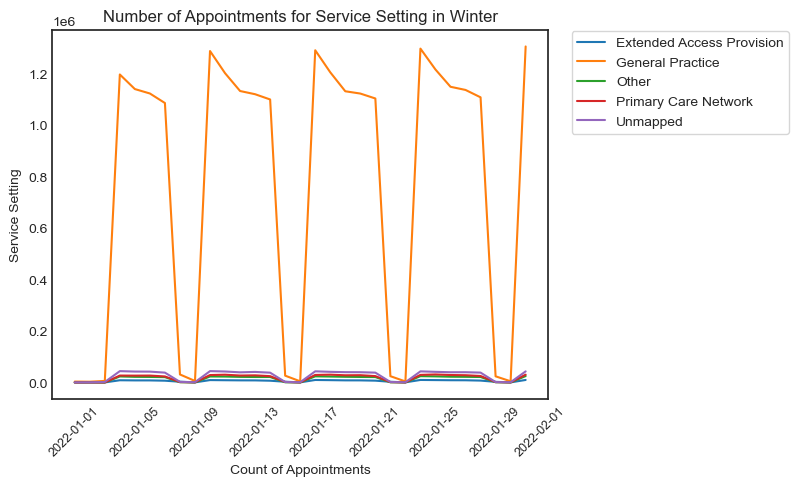

In [166]:
# Filter data (Winter)
Winter = nc_ss_day[nc_ss_day['appointment_month'] == '2022-01']

# Create lineplot for number of appointments in each service setting during Winter
sns.lineplot(x='appointment_date',
             y='count_of_appointments',
             data= Winter,
             hue = 'service_setting',
             ci = None) 

plt.title('Number of Appointments for Service Setting in Winter')
plt.xlabel('Count of Appointments', fontsize=10)
plt.xticks(fontsize=9, rotation=45)
plt.ylabel('Service Setting')
plt.legend(loc='lower right', frameon=True, bbox_to_anchor=(1.5,0.7))

plt.savefig('winter.png')

**Spring**

/var/folders/1t/87673c8s7d907kqz2mmpmfr80000gn/T/ipykernel_75418/3362032504.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='appointment_date',


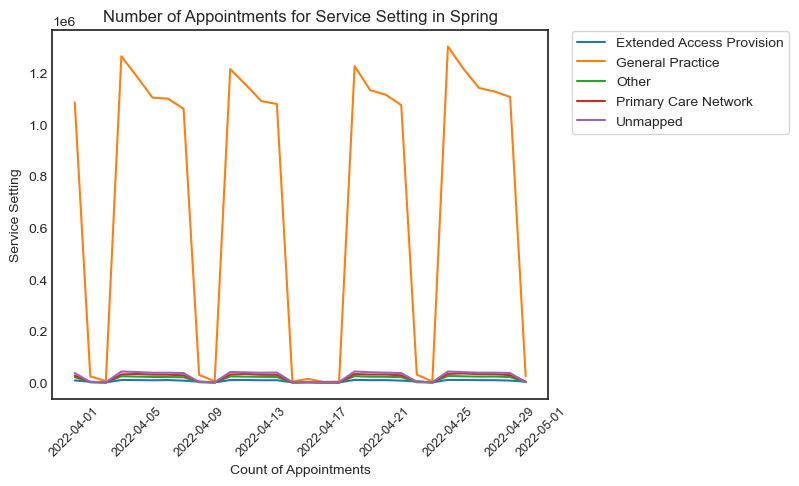

In [200]:
# Filter data (Spring)
Spring = nc_ss_day[nc_ss_day['appointment_month'] == '2022-04']

# Create lineplot for number of appointments in each service setting during Winter
sns.lineplot(x='appointment_date',
             y='count_of_appointments',
             data= Spring,
             hue = 'service_setting',
             ci = None) 
 

plt.title('Number of Appointments for Service Setting in Spring')
plt.xlabel('Count of Appointments', fontsize=10)
plt.xticks(fontsize=9, rotation=45)
plt.ylabel('Service Setting')
plt.legend(loc='lower right', frameon=True, bbox_to_anchor=(1.5,0.7))

plt.savefig('Spring_ss.png')

## 5. Analysing NHS-related twitter data

**Report:** Twitter data does not drive enough insight into our data. If my skills were more advanced on python I predict retrieving 'text' from tweets related to the NHS will help get better inisght into patient and client views, (constructive criticism if there are areas to improve or inisght on what is going well). 

In [85]:
# Load twitter data
tweets = pd.read_csv("tweets.csv")

# View top 5 rows
tweets.head(5)

,tweet_id,tweet_full_text,tweet_entities,tweet_entities_hashtags,tweet_metadata,tweet_retweet_count,tweet_favorite_count,tweet_favorited,tweet_retweeted,tweet_lang
0,1567629223795527681,As Arkansas’ first Comprehensive Stroke Certif...,"{'hashtags': [{'text': 'Healthcare', 'indices'...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 're...",0,0,False,False,en
1,1567582846612553728,RT @AndreaGrammer: Work-life balance is at the...,"{'hashtags': [{'text': 'PremiseHealth', 'indic...","#PremiseHealth, #hiring","{'iso_language_code': 'en', 'result_type': 're...",2,0,False,False,en
2,1567582787070304256,RT @OntarioGreens: $10 billion can go a long w...,"{'hashtags': [{'text': 'Healthcare', 'indices'...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 're...",39,0,False,False,en
3,1567582767625428992,RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies...,"{'hashtags': [{'text': 'NEW', 'indices': [20, ...",#NEW,"{'iso_language_code': 'en', 'result_type': 're...",5,0,False,False,en
4,1567582720460570625,ICYMI: Our recent blogs on Cybersecurity in Ac...,"{'hashtags': [{'text': 'blogs', 'indices': [18...","#blogs, #digitaltransformation, #cybersecurity...","{'iso_language_code': 'en', 'result_type': 're...",0,0,False,False,en


In [238]:
# View count of each number of favorites and retweets
print("Retweets count:")
print(tweets['tweet_retweet_count'].value_counts())
print("Favorites count:")
print(tweets['tweet_favorite_count'].value_counts())

Retweets count:
0      526
1      215
2      114
3       70
5       35
4       27
7       18
12      16
8       15
73      14
9       13
6       12
208     12
35      10
37       6
11       6
10       5
53       5
44       4
150      4
63       4
76       3
85       3
41       3
62       3
207      3
68       3
78       2
23       2
24       2
72       2
16       2
13       1
49       1
48       1
15       1
107      1
14       1
79       1
20       1
39       1
19       1
303      1
57       1
40       1
54       1
169      1
Name: tweet_retweet_count, dtype: int64
Favorites count:
0     1027
1       91
2       16
3       13
4        7
5        5
6        2
17       1
12       1
10       1
8        1
13       1
11       1
7        1
20       1
28       1
14       1
18       1
9        1
42       1
Name: tweet_favorite_count, dtype: int64


In [89]:
# Filter dataframe and keep columns with text
tweets_text = tweets[['tweet_full_text','tweet_entities','tweet_entities_hashtags',
                     'tweet_metadata','tweet_lang']]
# View first 5 rows of filtered dataframe
tweets_text.head()

,tweet_full_text,tweet_entities,tweet_entities_hashtags,tweet_metadata,tweet_lang
0,As Arkansas’ first Comprehensive Stroke Certif...,"{'hashtags': [{'text': 'Healthcare', 'indices'...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 're...",en
1,RT @AndreaGrammer: Work-life balance is at the...,"{'hashtags': [{'text': 'PremiseHealth', 'indic...","#PremiseHealth, #hiring","{'iso_language_code': 'en', 'result_type': 're...",en
2,RT @OntarioGreens: $10 billion can go a long w...,"{'hashtags': [{'text': 'Healthcare', 'indices'...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 're...",en
3,RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies...,"{'hashtags': [{'text': 'NEW', 'indices': [20, ...",#NEW,"{'iso_language_code': 'en', 'result_type': 're...",en
4,ICYMI: Our recent blogs on Cybersecurity in Ac...,"{'hashtags': [{'text': 'blogs', 'indices': [18...","#blogs, #digitaltransformation, #cybersecurity...","{'iso_language_code': 'en', 'result_type': 're...",en


In [91]:
# Create a variable and assign empty list
tags = []

# Use for loop to specify iterator variable and sequence
for y in [x.split(' ') for x in tweets['tweet_full_text'].values]:
    for z in y:
        if '#' in z:
            # Change to lowercase.
            tags.append(z.lower())

# Create dataframe using new variables            
tags_series = pd.Series(tags)
tags_data = tags_series.value_counts().reset_index()
tags_data.columns = ['word', 'count']

# View first five rows of dataframe
tags_data.head()

,word,count
0,#healthcare,716
1,#health,80
2,#medicine,41
3,#ai,40
4,#job,38


In [92]:
# View last 5 rows of dataframe
tags_data.tail()

,word,count
1749,#evestudy,1
1750,#patientdata…,1
1751,#secure,1
1752,#sms,1
1753,\n#csjmu,1


In [98]:
# Sense-check data by looking for shape, metadata and statistical summary
print("Dataframe shape:")
print(tags_data.shape)

print("Dataframe metadata:")
print(tags_data.info)

print("Dataframe statistical summary:")
print(tags_data.describe)

Dataframe shape:
(1754, 2)
Dataframe metadata:
<bound method DataFrame.info of                word  count
0       #healthcare    716
1           #health     80
2         #medicine     41
3               #ai     40
4              #job     38
...             ...    ...
1749      #evestudy      1
1750  #patientdata…      1
1751        #secure      1
1752           #sms      1
1753       \n#csjmu      1

[1754 rows x 2 columns]>
Dataframe statistical summary:
<bound method NDFrame.describe of                word  count
0       #healthcare    716
1           #health     80
2         #medicine     41
3               #ai     40
4              #job     38
...             ...    ...
1749      #evestudy      1
1750  #patientdata…      1
1751        #secure      1
1752           #sms      1
1753       \n#csjmu      1

[1754 rows x 2 columns]>


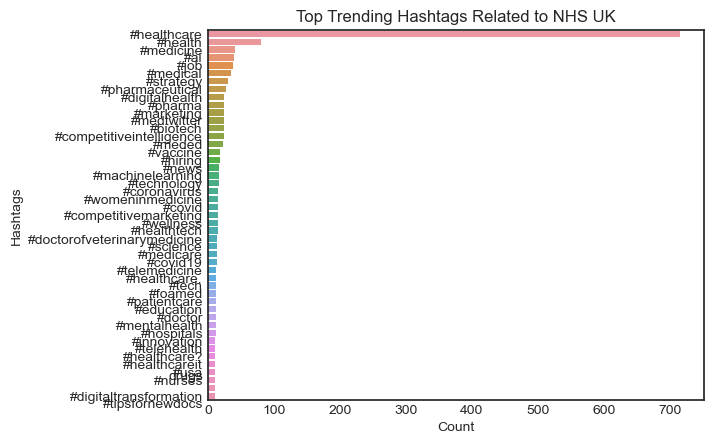

<Figure size 640x480 with 0 Axes>

In [95]:
# Create bar graph to view most used hashtags
sns.barplot(x='count', y='word', data=tags_data[tags_data['count'] > 10])

plt.title('Top Trending Hashtags Related to NHS UK')
plt.xlabel('Count')
plt.ylabel('Hashtags')
plt.savefig('trending.png')

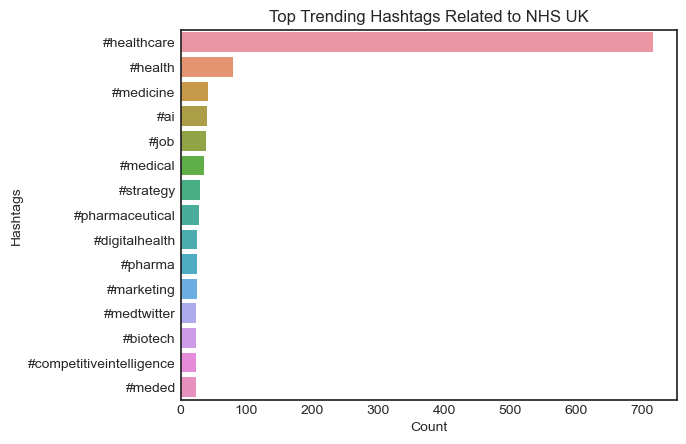

In [304]:
# Create barplot to show hashtags used over 20 times to show top used hashtags
sns.barplot(x='count', y='word', data=tags_data[tags_data['count'] >= 20])

plt.title('Top Trending Hashtags Related to NHS UK')
plt.xlabel('Count')
plt.ylabel('Hashtags')
plt.savefig('tophash.png')

## 6.0 Making recommendations

In [146]:
# Filter ar_clean dataset to show data from 2021-08 onwards
ar2 = ar_clean[ar_clean['appointment_month'] >= '2021-08']

# View first 2 rows of dataframe
ar2.head(2)

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
3652,E54000034,2021-08-01,Attended,GP,Face-to-Face,1 Day,6553
3653,E54000034,2021-08-01,Attended,GP,Face-to-Face,15 to 21 Days,2390


**Question 1: Should the NHS start looking at increasing staff levels?**

**Report:**
- Based on the regional appointments dataset there has been an influx of appointments from august 2021 until September 2021.
- Number of appointments stayed stagnant with a slight increase from October 2021 until 2011 averaging around 1.2 million appointments per day. 
- A sudden drop in number of appointments in November 2021 from over 3 million appointments per month to 2.55 million appointments in December 2021.
- Between December 2021 and February 2022 averaged around 2.5 million appointments each month.
- A sudden influx on appointments from Feburary 2022 to March 2022 (peaking at just less than million appointments and dropping at April to 2.4 million appointments.
- Number of appointments fluctuating from feburary 2022 until June 2022.

In [147]:
# Aggregate appointment regional dataset
ar_agg = ar2.groupby(['appointment_month', 'hcp_type', 'appointment_status', 
                   'appointment_mode', 'time_between_book_and_appointment'])\
['count_of_appointments']\
.sum()\
.reset_index()

# Group data by appointment month and count of appointments
ar_df = ar_agg.groupby('appointment_month')[['count_of_appointments']].sum().reset_index()

# Calculate average daily number of appointments per month
ar_df['utilization'] = ar_df['count_of_appointments']/30

# View data shape and top 5 rows
print(ar_df.shape)
ar_df.head().round(1)

(11, 3)


,appointment_month,count_of_appointments,utilization
0,2021-08-01,23843177,794772.6
1,2021-09-01,28514685,950489.5
2,2021-10-01,30296850,1009895.0
3,2021-11-01,30395923,1013197.4
4,2021-12-01,25132174,837739.1


In [148]:
# Change datetime datatype to string to improve visualisation
ar_df['appointment_month'] = ar_df['appointment_month'].dt.strftime('%Y-%m-%d')

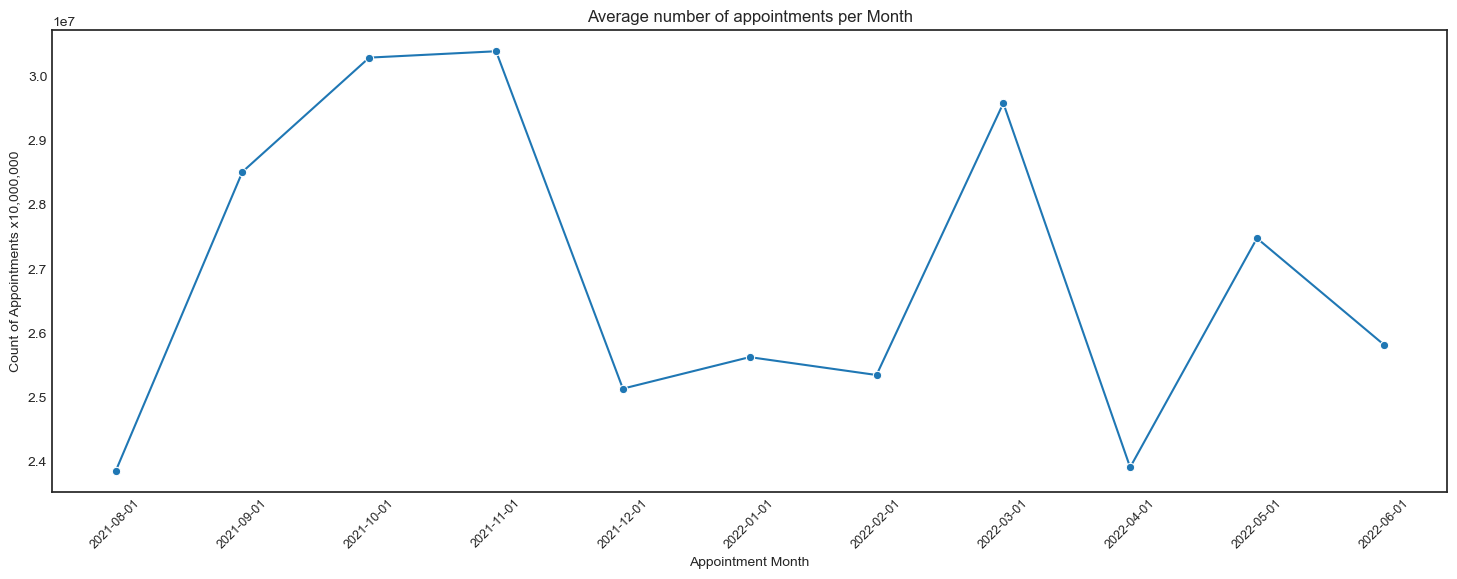

In [149]:
# Create lineplot to show average number of appointments monthly
plt.figure(figsize=(18,6))
sns.lineplot(x='appointment_month',
             y='count_of_appointments',
             data =ar_df,
             marker = 'o')

# Edit plot 
plt.title("Average number of appointments per Month")
plt.xlabel("Appointment Month")
plt.ylabel("Count of Appointments x10,000,000")
plt.xticks(fontsize=9, rotation =45)

# Save plot
plt.savefig('av_mon.png')

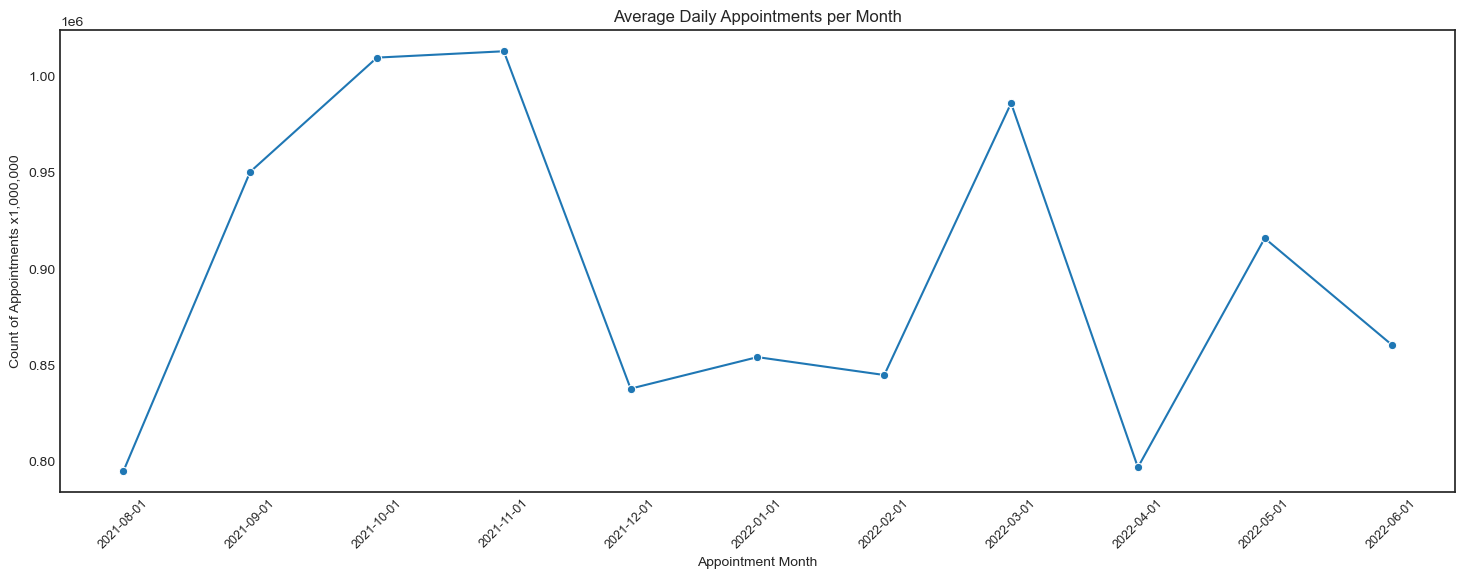

In [150]:
# Create lineplot to show average daily number of appointments each Month
plt.figure(figsize=(18,6))
sns.lineplot(x='appointment_month',
             y='utilization',
             data =ar_df,
             marker = 'o')

# Edit plot
plt.title("Average Daily Appointments per Month")
plt.xlabel("Appointment Month")
plt.ylabel("Count of Appointments x1,000,000")
plt.xticks(fontsize=9, rotation =45)

# Save plot
plt.savefig('avg_d.png')

**Question 2: How do the healthcare professional types differ over time?**

**Report:**
- GPs are generally more than other practice staff except for December 2021 where other practice staff were slightly more.
 - GPs and other practice staff are directly proportionate to number of appointments each month, with Unknown almost not changing through out.


/var/folders/1t/87673c8s7d907kqz2mmpmfr80000gn/T/ipykernel_75418/2684711169.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='appointment_month',


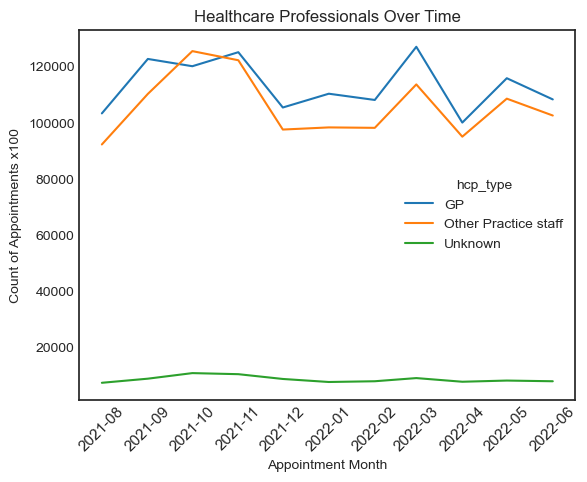

In [380]:
# Create lineplot to show healthcare profesionals over time
sns.lineplot(x='appointment_month',
             y='count_of_appointments',
             data= ar_agg,
             hue= 'hcp_type',
             ci = None)

# Edit plot
plt.title("Healthcare Professionals Over Time")
plt.xlabel("Appointment Month")
plt.ylabel("Count of Appointments x100")
plt.xticks(fontsize=11, rotation =45)

#Save plot
plt.savefig('hcp.png')

In [398]:
# Create dataframe grouping by appointment month and healthcare professioals
hcp = ar2.groupby(['appointment_month','hcp_type'])['count_of_appointments']\
.sum()\
.reset_index()

# View first 8 rows of the data
hcp.head(8)

,appointment_month,hcp_type,count_of_appointments
0,2021-08-01,GP,12296193
1,2021-08-01,Other Practice staff,10792831
2,2021-08-01,Unknown,754153
3,2021-09-01,GP,14484242
4,2021-09-01,Other Practice staff,13123644
5,2021-09-01,Unknown,906799
6,2021-10-01,GP,14298054
7,2021-10-01,Other Practice staff,14939015


In [317]:
# Calculate total number of appointments each month
total_mon = hcp.groupby('appointment_month')['count_of_appointments']\
.sum()

# Number of appointments each month
total_mon

appointment_month
2021-08-01    23843177
2021-09-01    28514685
2021-10-01    30296850
2021-11-01    30395923
2021-12-01    25132174
2022-01-01    25623928
2022-02-01    25344812
2022-03-01    29586020
2022-04-01    23904960
2022-05-01    27478652
2022-06-01    25819426
Name: count_of_appointments, dtype: int64

In [326]:
# View datatype to make changes if needed 
print(hcp.dtypes)

appointment_month        datetime64[ns]
hcp_type                         object
count_of_appointments             int64
total_mon_appt                   object
dtype: object


In [354]:
# Define each month by number of appointments
def get_count_based_on_month(value):
    if value == '2021-08-01':
        return "23843177"
    elif value == '2021-09-01':
        return "28514685"
    elif value == '2021-10-01':
        return "30296850"
    elif value == '2021-11-01':
        return "30395923"
    elif value == '2021-12-01':
        return "25132174"
    elif value == '2022-01-01':
        return "25623928"
    elif value == '2022-02-01':
        return "25344812"
    elif value == '2022-03-01':
        return "29586020"
    elif value == '2022-04-01':
        return "23904960"
    elif value == '2022-05-01':
        return "27478652"
    elif value == '2022-06-01':
        return "25819426"
    else:
        return "Unknown"
    
# Add column to hcp dataframe
hcp = hcp.assign(total_mon_appt=hcp['appointment_month'].apply(get_count_based_on_month))

# View dataframe
hcp.head()

,appointment_month,hcp_type,count_of_appointments,total_mon_appt
0,2021-08-01,GP,12296193,23843177
1,2021-08-01,Other Practice staff,10792831,23843177
2,2021-08-01,Unknown,754153,23843177
3,2021-09-01,GP,14484242,28514685
4,2021-09-01,Other Practice staff,13123644,28514685


In [392]:
# Change column to integer
hcp['total_mon_appt'] = hcp['total_mon_appt'].astype(int)

# Create column with percentages for each hcp each month
hcp['hcp_total%'] = hcp['count_of_appointments']/hcp['total_mon_appt'] * 100

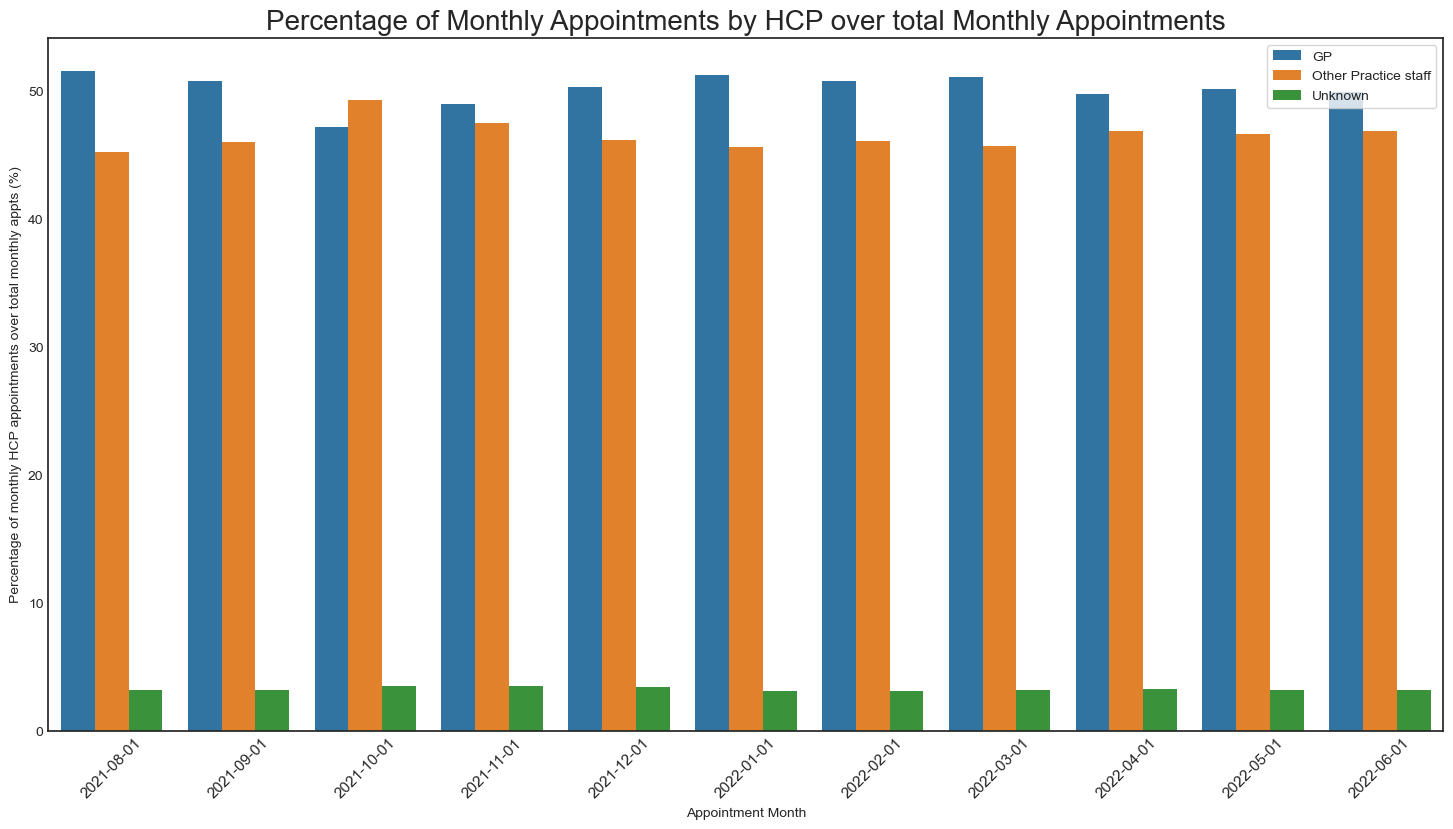

In [394]:
# Create plot to show percentages
plt.figure(figsize=(18,9))
sns.barplot(x='appointment_month',
            y='hcp_total%',
            hue='hcp_type',
            data = hcp)
# Edit plot
plt.title("Percentage of Monthly Appointments by HCP over total Monthly Appointments", 
         fontsize = 20)
plt.xlabel("Appointment Month")
plt.ylabel("Percentage of monthly HCP appointments over total monthly appts (%)")
plt.xticks(fontsize=11, rotation =45)
plt.legend(loc=('upper right'), bbox_to_anchor=(1,1), frameon=True)

# Save plot
plt.savefig('hcp_ratio.png')

**Question 3: Are there significant changes in whether or not visits are attended?** 

**Report:**
- Appointments not attended and Unknown are fairly low which indicates positive patient attendance and good recording of data.

/var/folders/1t/87673c8s7d907kqz2mmpmfr80000gn/T/ipykernel_75418/1986593580.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='appointment_month',


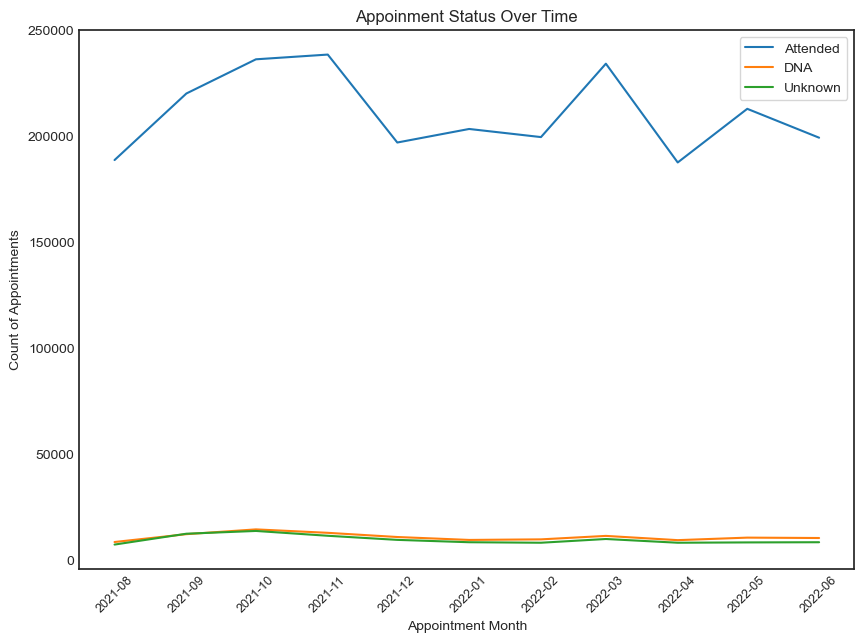

In [427]:
# Create lineplot to show appointment status overtime
plt.figure(figsize=(10,7))
sns.lineplot(x='appointment_month',
             y='count_of_appointments',
             data=ar_agg,
             hue = 'appointment_status',
             ci = None)

# Edit plot
plt.title("Appoinment Status Over Time")
plt.xlabel('Appointment Month')
plt.ylabel('Count of Appointments')
plt.xticks(fontsize = 9, rotation= 45)
plt.legend(frameon=True)

# Save plot
plt.savefig('app_status.png')

**Question 4: Are there changes in terms of appointment type and the busiest months?**

**Report:**
- Visualisation shows that Face-to-Face appointments (around 190,000 to 270,000 appointments per month) and Telephone appointments (around 110,000 to 145,000 appointments per month) are most popular.
- There has been no video/online and home visit appointments between August 2021 and June 2022.
- Number of face to face appointments is proportionate to total number of appointments over time, except in Janurary 2022 where we can see a slight increase in telephone appointments and slight decrease on face-to-face appointments however, face to face appointements are still significantly higher. 

/var/folders/1t/87673c8s7d907kqz2mmpmfr80000gn/T/ipykernel_75418/2367342350.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='appointment_month',


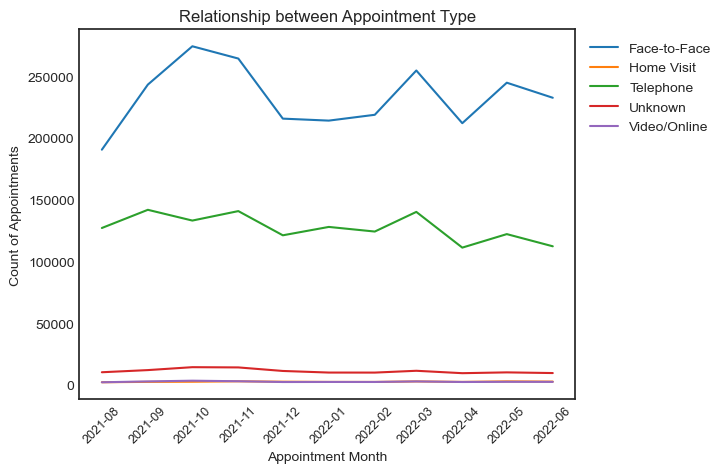

In [154]:
# Create lineplot to show appointment mode per month
sns.lineplot(x='appointment_month',
             y='count_of_appointments',
             data= ar_agg,
             hue='appointment_mode',
             ci= None)

# Edit plot
plt.title("Relationship between Appointment Type")
plt.xlabel('Appointment Month')
plt.ylabel('Count of Appointments')
plt.xticks(fontsize=9, rotation=45)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

# Save plot
plt.savefig('app_mode.png')

**Question 5: Are there any trends in time between booking and appointment?** 

**Report:**
- Visualisation indicates good availability of appointments and effeicient scheduling as time between booking and appointments is fairly short.
- Booking and recieving an appointment on the same day is most popular and proportionate to total appointments each month.
- Most appointments are booked within 2 weeks.
- 0 unknown waiting time throughout all months reflecting good data recording.

/var/folders/1t/87673c8s7d907kqz2mmpmfr80000gn/T/ipykernel_75418/3316765019.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='appointment_month',


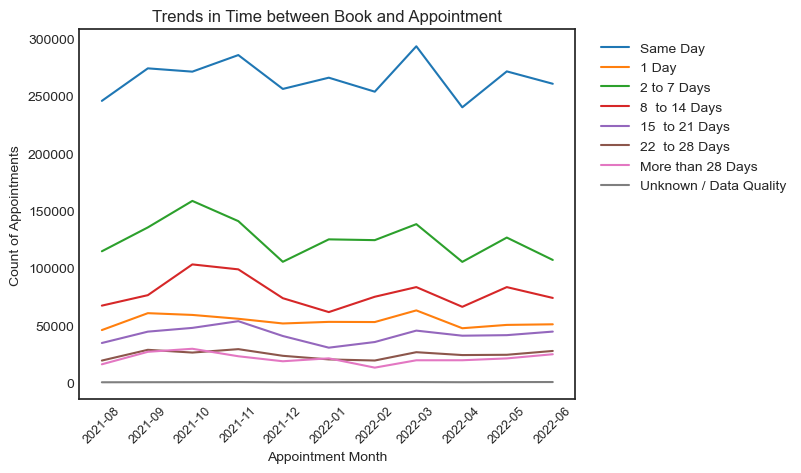

In [199]:
# Set order for 'time_between_book_and_appointment' series
booking = ['Same Day', '1 Day', '2 to 7 Days', '8  to 14 Days'
                , '15  to 21 Days', '22  to 28 Days', 'More than 28 Days',
                'Unknown / Data Quality']

# Create lineplot
sns.lineplot(x='appointment_month',
                y='count_of_appointments',
                hue='time_between_book_and_appointment',
                hue_order=booking,
                data=ar_agg,
                ci = None)

# Edit plot
plt.title('Trends in Time between Book and Appointment')
plt.xlabel('Appointment Month')
plt.ylabel('Count of Appointments')
plt.xticks(fontsize=9, rotation=45)
plt.legend(loc='upper right', bbox_to_anchor=(1.45, 1))

# Save plot
plt.savefig('booking.png')

**Question 6: How do the various service settings compare?**

**Report:**
- General practices stays consistantly the most popular service setting.
- After excluding general practices from visualisation we can see that 'unmapped' data is quite high compared to the other services indicating a lack of good documetation, although it appears to be decreasing over time.
- An increase in Primary Care Network service settings over time.

In [202]:
# View nc dataframe
nc.head(2)

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08


In [204]:
# Create dataframe that groups by appointment month and count of appointments
nc_services = nc.groupby(['appointment_month','service_setting'])['count_of_appointments']\
.sum()\
.reset_index()

#View dataframe
nc_services

,appointment_month,service_setting,count_of_appointments
0,2021-08,Extended Access Provision,160927
1,2021-08,General Practice,21575852
2,2021-08,Other,449101
3,2021-08,Primary Care Network,432448
4,2021-08,Unmapped,1233843
5,2021-09,Extended Access Provision,187906
6,2021-09,General Practice,25940821
7,2021-09,Other,527174
8,2021-09,Primary Care Network,530485
9,2021-09,Unmapped,1336115


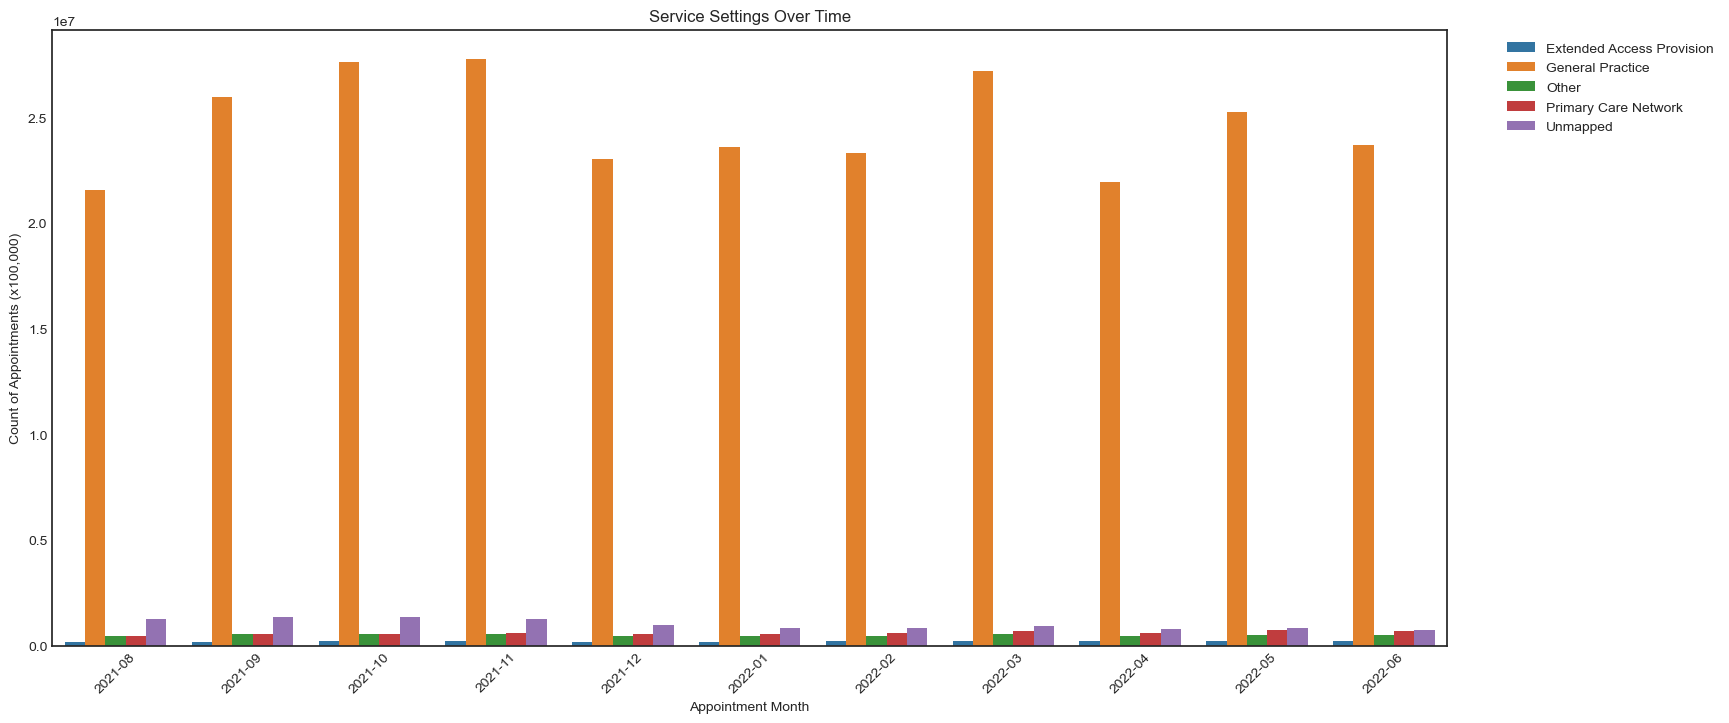

In [205]:
# Create a barplot to show comparison between service settings over months
plt.figure(figsize=(18,8))
sns.barplot(x='appointment_month',
            y='count_of_appointments',
            hue='service_setting',
            data=nc_services)

# Edit plot
plt.title("Service Settings Over Time")
plt.xlabel('Appointment Month')
plt.ylabel('Count of Appointments (x100,000)')
plt.xticks(rotation=45)
plt.legend(loc='upper right', bbox_to_anchor=(1.2,1))

# Save plot
plt.savefig('ss_comp.png')

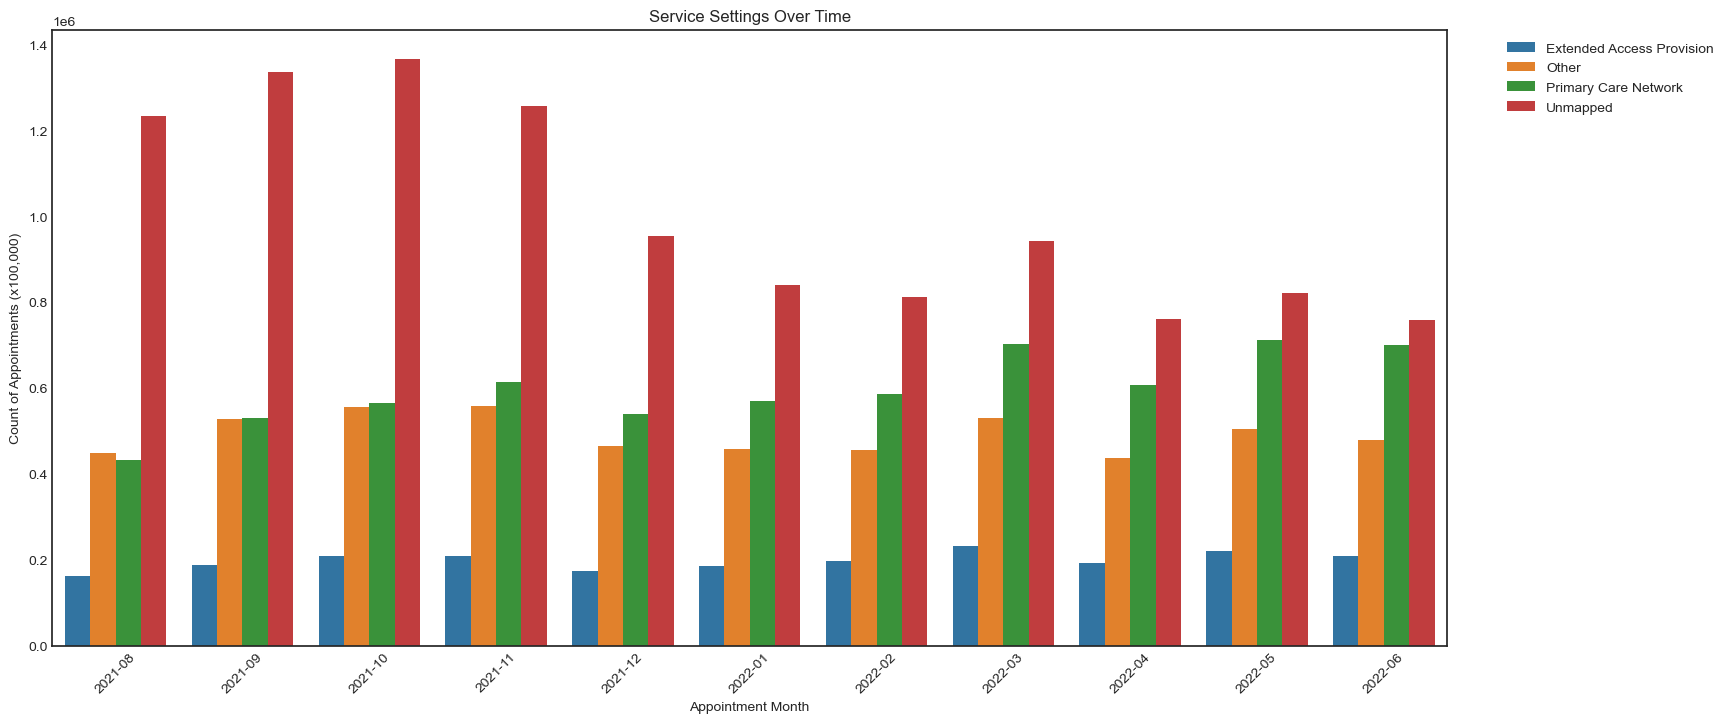

In [206]:
# Barplot excluding 'GP' to get a deeper understanding of other service settings
# Filter out 'GP'
exclude_gp = nc_services[nc_services['service_setting'] != 'General Practice']

# Create plot
plt.figure(figsize=(18,8))
sns.barplot(x='appointment_month',
            y='count_of_appointments',
            hue='service_setting',
            data= exclude_gp)
# Edit plot
plt.title("Service Settings Over Time")
plt.xlabel('Appointment Month')
plt.ylabel('Count of Appointments (x100,000)')
plt.xticks(rotation=45)
plt.legend(loc='upper right', bbox_to_anchor=(1.2,1))

# Savve plot
plt.savefig('ss_nogp.png')

**Summary of Analysis:**


- Based on my analysis there are 7 regions further divided into 42 ICB locations and 106 sub-ICB locations.(ICB stands for Integrated Care Board which is responsible for managing health services in geographical areas.)
- There are 5 service settings with General Practices making up 91.48% of total services.
- There are 3 context types with "care related encouters" making upto 86.84% of total context types.
- There are 18 national categories with general consultations (routine and acute) and clinical triage being the most popular. 
- There are 3 appointment statuses with Attended making up 91.26% of all appointments.
- Date range on the actual duration dataset was from 01/01/2021 to 30/06/2022 with 167,980,692 appointments in 18 months. (monthly average = 9,332,260)
- Date range on appointments regional dataset was from 01/01/2020 to 01/06/2022 with 742,529,957 appointments in 29 months.(monthly average = 25,604,481)
- Date range on national categories dataset ranged from 01/08/2021 to 30/06/2022 with 296,046,770 appointments in 11 months. (monthly average = 26,913,342)
- No appointments over the weekend in all seasons with highest number of appointments falling on Mondays and gradually decreasing during the week.
- Summer season has the lowest number of appointments compared to all seasons.
- NHS-related most popular hashtags are #healthcare used 716 times followed by #health used 80 times. 
- There are a total of 1753 different hashtags related to the NHS. 
- Visualisations indicate adequate staffing and utilisation of resources as number of total appointments is less than 1.2 million per day. 


**Recommendations:** 
- In future, it’d be helpful to retrieve texts related to nhs hashtags and top related tweets to get better insight on customers views.
- Allow online booking based on open time slots in real time to help fill gaps and decrease waiting time.
- Ensure adequate and flexible staffing to accommodate to demands through offering weekend shifts/ over time and part time roles to health care professionals. 
- Increase use of telephone appointments as they can help with patients who find difficulty in leaving the house due to illnesses and can decrease strain on face-to-face appointments. 
- Investigate why there is a reduction in telephone appointments over time
- Increase staffing over Autumn and Winter by offering temporary roles through locuming and overtime shifts over weekend to help meet demands. 
- Ensure clear guidelines and policies on data documentation to decrease number of undocumented data. 
- Availability of data on count of healthcare professionals in each service setting to help determine the ratio of HCP to appointments and get a better understanding of staff capacity 